# Sandbox notebook with experiments for detection and manipulation.

After training a decent autencoder over the ssh server, we began experimenting with different methods of changing the coor fo the eye, and manipulating the latent vectors or embeddings of te images.

The first 20 or so cells (ending with the output that is similar to UBIRIS_Autoencoder_Manip.ipynb) contain previously used code. The cells that follow contain testing of different methods of iris detection, and color changing.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Conv2DTranspose, BatchNormalization
from tensorflow.keras.models import Model, load_model
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
from scipy import interpolate

In [ ]:
# Load the saved latent vectors and encoder model (FULL)
filepath = r'/content/drive/MyDrive/ML final project/Trained_models/encoder/encoder_model.h5'
latent_vectors = np.load('/content/drive/MyDrive/ML final project/Trained_models/encoder/latent_vectors.npy')
image_data = np.load('/content/drive/MyDrive/ML final project/Trained_models/encoder/image_data.npy')
# (Filtered)
#filepath = r'/content/drive/MyDrive/ML final project/Trained_models/encoder/encoder_filtered/encoder_model8.h5'
#latent_vectors = np.load('/content/drive/MyDrive/ML final project/Trained_models/encoder/encoder_filtered/latent_vectors8.npy')
encoder = load_model(filepath)
#encoder = tf.keras.layers.TFSMLayer('encoder_model', call_endpoint='serving_default')
#image_data = np.load('/content/drive/MyDrive/ML final project/Trained_models/encoder/encoder_filtered/image_data8.npy')

In [ ]:
import numpy as np

# Normalize the latent vector to range 0 to 1 for better interpretability
def scale_latent_vector(latent_vector):
    min_val = np.min(latent_vector)
    max_val = np.max(latent_vector)

    # Normalize to [0, 1] range
    scaled_latent_vector = (latent_vector - min_val) / (max_val - min_val)
    return scaled_latent_vector

# Print the first latent vector scaled
scaled_latent_vector = scale_latent_vector(latent_vectors[0])
print(scaled_latent_vector)


[0.00000000e+00 1.41710982e-01 0.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00000000e+00 3.73345017e-01 0.00000000e+00
 1.19819835e-01 5.05177319e-01 0.00000000e+00 0.00000000e+00
 2.80057490e-01 0.00000000e+00 0.00000000e+00 2.08759338e-01
 6.15572155e-01 0.00000000e+00 0.00000000e+00 6.17286980e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.12263684e-02
 2.00281888e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.33718389e-01 0.00000000e+00 5.39678454e-01 0.00000000e+00
 0.00000000e+00 3.24640535e-02 0.00000000e+00 8.84229839e-02
 0.00000000e+00 0.00000000e+00 4.08385618e-04 0.00000000e+00
 4.79471475e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.56724310e-01 0.00000000e+00 4.31221724e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.58479446e-01 0.00000000e+00
 0.00000000e+00 1.13791995e-01 9.31488931e-01 3.39296907e-01
 1.01440050e-01 5.57893693e-01 0.00000000e+00 0.00000000e+00
 6.86886013e-01 3.72365713e-01 0.00000000e+00 0.00000000e+00]


In [ ]:
"""
# Define decoder architecture
latent_dim = 64  # Must match encoder's latent_dim
latent_input = tf.keras.Input(shape=(latent_dim,))


# Improved decoder layers with more filters and BatchNormalization
x = Dense(28 * 28 * 128, activation='relu')(latent_input)
x = BatchNormalization()(x)
x = Reshape((28, 28, 128))(x)

x = Conv2DTranspose(128, (3, 3), strides=(1, 1), padding='same', activation='relu')(x)
x = BatchNormalization()(x)

x = Conv2DTranspose(64, (3, 3), strides=(1, 1), padding='same', activation='relu')(x)
x = BatchNormalization()(x)

x = Conv2DTranspose(32, (3, 3), strides=(1, 1), padding='same', activation='relu')(x)
x = BatchNormalization()(x)

# Final layer with tanh activation for better color reproduction
decoded_output = Conv2DTranspose(3, (3, 3), activation='tanh', padding='same')(x)

# Create and compile decoder model with a custom loss
decoder = Model(latent_input, decoded_output, name="decoder")
decoder.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
    loss='mse'  # Mean squared error for better image quality
)

# Train the decoder with more epochs and a smaller batch size
print("Training decoder...")
decoder.fit(
    latent_vectors,
    image_data,
    epochs=50,  # Increased epochs
    batch_size=32,  # Smaller batch size
    shuffle=True,
    validation_split=0.1
)


# Save the trained decoder
decoder.save('/content/drive/MyDrive/ML final project/Trained_models/decoder/decoder_model.h5')
"""

'\n# Define decoder architecture\nlatent_dim = 64  # Must match encoder\'s latent_dim\nlatent_input = tf.keras.Input(shape=(latent_dim,))\n\n\n# Improved decoder layers with more filters and BatchNormalization\nx = Dense(28 * 28 * 128, activation=\'relu\')(latent_input)\nx = BatchNormalization()(x)\nx = Reshape((28, 28, 128))(x)\n\nx = Conv2DTranspose(128, (3, 3), strides=(1, 1), padding=\'same\', activation=\'relu\')(x)\nx = BatchNormalization()(x)\n\nx = Conv2DTranspose(64, (3, 3), strides=(1, 1), padding=\'same\', activation=\'relu\')(x)\nx = BatchNormalization()(x)\n\nx = Conv2DTranspose(32, (3, 3), strides=(1, 1), padding=\'same\', activation=\'relu\')(x)\nx = BatchNormalization()(x)\n\n# Final layer with tanh activation for better color reproduction\ndecoded_output = Conv2DTranspose(3, (3, 3), activation=\'tanh\', padding=\'same\')(x)\n\n# Create and compile decoder model with a custom loss\ndecoder = Model(latent_input, decoded_output, name="decoder")\ndecoder.compile(\n    opti

In [ ]:
# WORKING
# Function to reconstruct images from latent vectors
def reconstruct_images(latent_vectors, num_images=5):
    reconstructed = decoder.predict(latent_vectors[:num_images])
    reconstructed = np.clip(reconstructed, 0, 1)

    # Display original vs reconstructed images
    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        # Original image
        plt.subplot(2, num_images, i + 1)
        plt.imshow(image_data[i])
        plt.axis('off')
        if i == 0:
            plt.title('Original')

        # Reconstructed image
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(reconstructed[i])
        plt.axis('off')
        if i == 0:
            plt.title('Reconstructed')

    plt.tight_layout()
    plt.show()

# Function to interpolate between two images
def interpolate_images(latent_vector1, latent_vector2, num_steps=10):
    alphas = np.linspace(0, 1, num_steps)
    interpolated_vectors = []

    for alpha in alphas:
        interpolated_vector = (1 - alpha) * latent_vector1 + alpha * latent_vector2
        interpolated_vectors.append(interpolated_vector)

    interpolated_vectors = np.array(interpolated_vectors)
    interpolated_images = decoder.predict(interpolated_vectors)

    # Display interpolation results
    plt.figure(figsize=(15, 3))
    for i in range(num_steps):
        plt.subplot(1, num_steps, i + 1)
        plt.imshow(interpolated_images[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()


In [ ]:
print(os.path.exists(filepath))

True


In [ ]:

# WORKING
def get_color_examples(labels_df, latent_vectors, color_name, n=1):
    """Get latent vectors for eyes of a specific color"""
    color_indices = labels_df[labels_df['label'] == color_name].index[:n]
    return latent_vectors[color_indices]

def interpolate_color_sequence(decoder, latent_vectors, labels_df, colors=['brown', 'blue', 'hazel', 'green', 'gray'], steps_between=10):
    """Create a sequence of interpolations between different eye colors"""
    # Get one example for each color
    color_vectors = [get_color_examples(labels_df, latent_vectors, color, 1)[0] for color in colors]

    plt.figure(figsize=(20, 4 * (len(colors)-1)))
    current_plot = 1

    # Interpolate between consecutive colors
    for i in range(len(colors)-1):
        print(f"Interpolating from {colors[i]} to {colors[i+1]}...")

        # Create interpolation
        alphas = np.linspace(0, 1, steps_between)
        interpolated_vectors = []

        for alpha in alphas:
            interpolated_vector = (1 - alpha) * color_vectors[i] + alpha * color_vectors[i+1]
            interpolated_vectors.append(interpolated_vector)

        interpolated_vectors = np.array(interpolated_vectors)
        interpolated_images = decoder.predict(interpolated_vectors)
        interpolated_images = np.clip(interpolated_images, 0, 1)


        # Plot this interpolation sequence
        plt.subplot(len(colors)-1, 1, current_plot)
        for j in range(steps_between):
            plt.subplot(len(colors)-1, steps_between, (current_plot-1)*steps_between + j + 1)
            plt.imshow(interpolated_images[j])
            plt.axis('off')
            if j == 0:
                plt.title(f'{colors[i]}', loc='left')
            elif j == steps_between-1:
                plt.title(f'{colors[i+1]}', loc='right')

        current_plot += 1

    plt.tight_layout()
    plt.show()





In [ ]:
# Not WORKING
"""
if __name__ == "__main__":
    # Example usage
    print("Reconstructing sample images...")
    reconstruct_images(latent_vectors)

    print("\nInterpolating between two random images...")
    idx1, idx2 = np.random.randint(0, len(latent_vectors), 2)
    interpolate_images(latent_vectors[idx1], latent_vectors[idx2])

    # Load the labels
    labels_df = pd.read_csv('/content/drive/MyDrive/ML final project/datasets/iris_labels_full.csv')
    print("\nInterpolating between different eye colors...")
    interpolate_color_sequence(decoder, latent_vectors, labels_df)
"""

'\nif __name__ == "__main__":\n    # Example usage\n    print("Reconstructing sample images...")\n    reconstruct_images(latent_vectors)\n\n    print("\nInterpolating between two random images...")\n    idx1, idx2 = np.random.randint(0, len(latent_vectors), 2)\n    interpolate_images(latent_vectors[idx1], latent_vectors[idx2])\n\n    # Load the labels\n    labels_df = pd.read_csv(\'/content/drive/MyDrive/ML final project/datasets/iris_labels_full.csv\')\n    print("\nInterpolating between different eye colors...")\n    interpolate_color_sequence(decoder, latent_vectors, labels_df)\n'

In [ ]:
!pip install tensorflow==2.11.0

ERROR: Operation cancelled by user


In [ ]:
!pip install colormath

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from sklearn.cluster import KMeans
from colormath.color_objects import sRGBColor, LabColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie2000

# Load the trained decoder and necessary data
filepath = r'/content/drive/MyDrive/ML final project/Trained_models/decoder/decoder_model4.h5'
decoder = load_model(filepath, custom_objects={'Conv2DTranspose': tf.keras.layers.Conv2DTranspose})
latent_vectors = np.load('/content/drive/MyDrive/ML final project/Trained_models/encoder/latent_vectors4.npy')
image_data = np.load('/content/drive/MyDrive/ML final project/Trained_models/encoder/image_data4.npy')


In [ ]:
# WORKING
def reconstruct_images(latent_vectors, num_images=5):
    reconstructed = decoder.predict(latent_vectors[:num_images])
    reconstructed = np.clip(reconstructed, 0, 1)

    plt.figure(figsize=(15, 4))
    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(image_data[i])
        plt.axis('off')
        if i == 0:
            plt.title('Original')

        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(reconstructed[i])
        plt.axis('off')
        if i == 0:
            plt.title('Reconstructed')
        # Calculate Mean Squared Error (MSE)
        mse = np.mean(np.square(image_data[:num_images] - reconstructed))
        print(f"Reconstruction MSE: {mse}")

    plt.tight_layout()
    plt.show()

In [ ]:
# WORKING
def get_color_examples(labels_df, latent_vectors, color_name, n=1):
    """Get latent vectors for eyes of a specific color"""
    color_indices = labels_df[labels_df['label'] == color_name].index[:n]
    return latent_vectors[color_indices]

def interpolate_color_sequence(decoder, latent_vectors, labels_df, colors=['brown', 'blue', 'hazel', 'green'], steps_between=10):
    color_vectors = [get_color_examples(labels_df, latent_vectors, color, 1)[0] for color in colors]

    plt.figure(figsize=(20, 4 * (len(colors)-1)))
    current_plot = 1

    # Store interpolated images and corresponding color labels
    all_interpolated_images = []
    all_interpolated_labels = []

    for i in range(len(colors)-1):
        print(f"Interpolating from {colors[i]} to {colors[i+1]}...")

        alphas = np.linspace(0, 1, steps_between)
        interpolated_vectors = []

        for alpha in alphas:
            interpolated_vector = (1 - alpha) * color_vectors[i] + alpha * color_vectors[i+1]
            interpolated_vectors.append(interpolated_vector)

        interpolated_vectors = np.array(interpolated_vectors)
        interpolated_images = decoder.predict(interpolated_vectors)
        interpolated_images = np.clip(interpolated_images, 0, 1)

        for j in range(steps_between):
            plt.subplot(len(colors)-1, steps_between, (current_plot-1)*steps_between + j + 1)
            plt.imshow(interpolated_images[j])
            plt.axis('off')
            if j == 0:
                plt.title(f'{colors[i]}', loc='left')
            elif j == steps_between-1:
                plt.title(f'{colors[i+1]}', loc='right')

        all_interpolated_images.extend(interpolated_images)
        all_interpolated_labels.extend([colors[i]] * steps_between)

        current_plot += 1

    plt.tight_layout()
    plt.show()
    return np.array(all_interpolated_images), np.array(all_interpolated_labels)

In [ ]:
import random
# SOMEWHAT WORKING
def randomer_interpolater(decoder, latent_vectors, labels_df, colors=['brown', 'blue', 'hazel', 'green'], steps_between=10):
    """Create a sequence of interpolations between different eye colors using random images"""

    color_vectors = []
    for color in colors:
        # Get indices of images for the current color
        color_indices = labels_df[labels_df['label'] == color].index

        # Randomly select one image from the color indices
        random_index = random.choice(color_indices)
        color_vectors.append(latent_vectors[random_index])

    plt.figure(figsize=(20, 4 * (len(colors)-1)))
    current_plot = 1

    # Interpolate between consecutive colors
    for i in range(len(colors)-1):
        print(f"Interpolating from {colors[i]} to {colors[i+1]}...")

        # Create interpolation
        alphas = np.linspace(0, 1, steps_between)
        interpolated_vectors = []

        for alpha in alphas:
            interpolated_vector = (1 - alpha) * color_vectors[i] + alpha * color_vectors[i+1]
            interpolated_vectors.append(interpolated_vector)

        interpolated_vectors = np.array(interpolated_vectors)
        interpolated_images = decoder.predict(interpolated_vectors)
        interpolated_images = np.clip(interpolated_images, 0, 1)

        # Plot this interpolation sequence
        plt.subplot(len(colors)-1, 1, current_plot)
        for j in range(steps_between):
            plt.subplot(len(colors)-1, steps_between, (current_plot-1)*steps_between + j + 1)
            plt.imshow(interpolated_images[j])
            plt.axis('off')
            if j == 0:
                plt.title(f'{colors[i]}', loc='left')
            elif j == steps_between-1:
                plt.title(f'{colors[i+1]}', loc='right')

        current_plot += 1

    plt.tight_layout()
    plt.show()

SyntaxError: invalid syntax (<ipython-input-119-5dbe2079aaa0>, line 3)

In [ ]:
import cv2
# SOMEWHAT WORKING
def find_best_representative_images(image_data, labels_df, colors=['brown', 'blue', 'hazel', 'green']):
    """Finds the best representative image for each eye color class"""

    best_representatives = {}
    for color in colors:
        color_indices = labels_df[labels_df['label'] == color].index
        best_score = -1
        best_index = -1

        for index in color_indices:
            image = image_data[index]

            # Criteria 1: Centered Iris (using Hough Circle Transform)
            # Ensure the image is in the correct format (RGB) before converting to grayscale
            image = image.astype(np.uint8)  # Convert to 8-bit unsigned integer if necessary
            if image.ndim == 3 and image.shape[2] == 3:  # Check if the image is RGB
                gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
            else:
                # If the image is not RGB, assume it's already grayscale
                gray = image

            circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=10, maxRadius=30)
            if circles is not None:
                center_score = 1  # Higher score if a circle (iris) is detected
            else:
                center_score = 0

            # Criteria 2: Color Clarity (using standard deviation of color channels)
            color_clarity_score = np.std(image)  # Higher standard deviation indicates more color variation

            # Combine scores (adjust weights as needed)
            score = 0.7 * center_score

            if score > best_score:
                best_score = score
                best_index = index

        best_representatives[color] = image_data[best_index]

    # Display the best representative images
    """
    plt.figure(figsize=(15, 3))
    for i, color in enumerate(colors):
        plt.subplot(1, len(colors), i + 1)
        plt.imshow(best_representatives[color])
        plt.title(color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    """

    return best_representatives

In [ ]:
# BROKEN
def get_dominant_iris_color(image):
    # Convert to grayscale and apply Hough Circle Transform to detect the iris
    image = image.astype(np.uint8)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20,
                               param1=50, param2=30, minRadius=10, maxRadius=30)



    edges = cv2.Canny(gray, 2, 255, apertureSize=3)  # Adjust thresholds as needed
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.show()
    if circles is not None:
        circles = np.uint16(np.around(circles))

        # Select the largest circle as the most likely iris candidate
        largest_circle_index = np.argmax(circles[0, :, 2])
        x, y, r = circles[0, largest_circle_index]
        for i in circles[0, :]:
            # draw the outer circle
            cv2.circle(image,(i[0],i[1]),i[2],(0,255,0),2)
            # draw the center of the circle
            cv2.circle(image,(i[0],i[1]),2,(0,0,255),3)
        plt.imshow(image)
        plt.show()
        # Ensure the detected circle is within the image bounds
        if (0 <= y - r) and (y + r < image.shape[0]) and (0 <= x - r) and (x + r < image.shape[1]):
            iris_region = image[y - r:y + r, x - r:x + r]
            pixels = iris_region.reshape((-1, 3))

            kmeans = KMeans(n_clusters=1)
            kmeans.fit(pixels)
            dominant_color = kmeans.cluster_centers_[0]

            return dominant_color
        else:
            # Circle is partially outside the image, skip it
            return None  # Or handle differently if desired
    else:
        # No circles detected
        print("None detected")
        return None

In [ ]:
def calculate_interpolation_accuracy(interpolated_images, true_labels, color_mapping):
    predicted_labels = []
    for image in interpolated_images:
        dominant_color = get_dominant_iris_color(image)
        if dominant_color is not None:
            min_dist = float('inf')
            predicted_color = None

            for color_name, color_value in color_mapping.items():
                color1_rgb = sRGBColor(*dominant_color / 255.0)
                color2_rgb = sRGBColor(*np.array(color_value) / 255.0)
                color1_lab = convert_color(color1_rgb, LabColor)
                color2_lab = convert_color(color2_rgb, LabColor)

                delta_e = delta_e_cie2000(color1_lab, color2_lab)

                if delta_e < min_dist:
                    min_dist = delta_e
                    predicted_color = color_name

            predicted_labels.append(predicted_color)
        else:
            predicted_labels.append(None)

    # Filter out None values (cases where iris was not detected)
    valid_indices = [i for i, label in enumerate(predicted_labels) if label is not None]
    predicted_labels = np.array(predicted_labels)[valid_indices]
    true_labels = true_labels[valid_indices]

    # Calculate accuracy
    accuracy = np.mean(predicted_labels == true_labels)
    print(f"Interpolation Accuracy: {accuracy}")
    return accuracy

In [ ]:
# BROKEN

def apply_iris_color(base_image, target_image, color_to_apply):
    """
    Applies the extracted iris color to the target image using Hough Circles.
    """
    # Convert to grayscale and apply Hough Circle Transform to detect the iris
    base_image = base_image.astype(np.uint8)  # Convert to 8-bit unsigned integer if necessary
    if base_image.ndim == 3 and base_image.shape[2] == 3:  # Check if the image is RGB
        gray = cv2.cvtColor(base_image, cv2.COLOR_RGB2GRAY)
    else:
        # If the image is not RGB, assume it's already grayscale
        gray = base_image
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=10, maxRadius=30)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            # Extract the iris region using the detected circle
            x, y, r = i[0], i[1], i[2]
            iris_region = target_image[y - r:y + r, x - r:x + r]

            # Apply the extracted color to the iris region
            iris_region[:, :, :] = color_to_apply.astype(np.uint8)

    return target_image  # Return the modified target image

In [ ]:
# BROKEN

def interpolate_and_apply_color_from_classes(base_image, image_data, labels_df, colors=['brown', 'blue', 'green', 'hazel'], steps_between=10):
    """
    Interpolates between dominant iris colors of different eye color classes and applies them to the base image.
    """
    # Get the best representative images for each color class
    best_representatives = find_best_representative_images(image_data, labels_df, colors)

    # Extract dominant colors from the representative images
    colors_to_apply = [get_dominant_iris_color(best_representatives[color]) for color in colors]

    base_image = best_representatives['brown']

    # Create target images (copies of the base image)
    target_images = [base_image.copy() for _ in range(len(colors))]

    # Call the main interpolation function
    interpolate_and_apply_color(base_image, target_images, colors_to_apply, steps_between)


def interpolate_and_apply_color(base_image, target_images, colors_to_apply, steps_between=10):
    """
    Interpolates between colors and applies them to the target images.
    """
    num_colors = len(colors_to_apply)

    plt.figure(figsize=(20, 4 * num_colors))

    for i, color_to_apply in enumerate(colors_to_apply):
        # Get dominant color of base image
        base_color = get_dominant_iris_color(base_image)

        # Convert colors to Lab color space for better interpolation
        base_color_lab = convert_color(sRGBColor(*base_color / 255.0), LabColor)
        target_color_lab = convert_color(sRGBColor(*color_to_apply / 255.0), LabColor)

        # Interpolate between colors in Lab space
        interpolated_colors_lab = [
            base_color_lab + (target_color_lab - base_color_lab) * alpha
            for alpha in np.linspace(0, 1, steps_between)
        ]

        # Convert back to RGB
        interpolated_colors_rgb = [
            convert_color(color_lab, sRGBColor).get_value_tuple() * 255.0
            for color_lab in interpolated_colors_lab
        ]

        # Apply interpolated colors to target images
        for j, interpolated_color in enumerate(interpolated_colors_rgb):
            modified_image = apply_iris_color(base_image, target_images[i].copy(), interpolated_color)

            # Plot the modified image
            plt.subplot(num_colors, steps_between, i * steps_between + j + 1)
            plt.imshow(modified_image)
            plt.axis('off')

    plt.tight_layout()
    plt.show()

Reconstructing sample images...
1/1 [==============================] - 0s 279ms/step
Reconstruction MSE: 0.014875064603984356
Reconstruction MSE: 0.014875064603984356
Reconstruction MSE: 0.014875064603984356
Reconstruction MSE: 0.014875064603984356
Reconstruction MSE: 0.014875064603984356


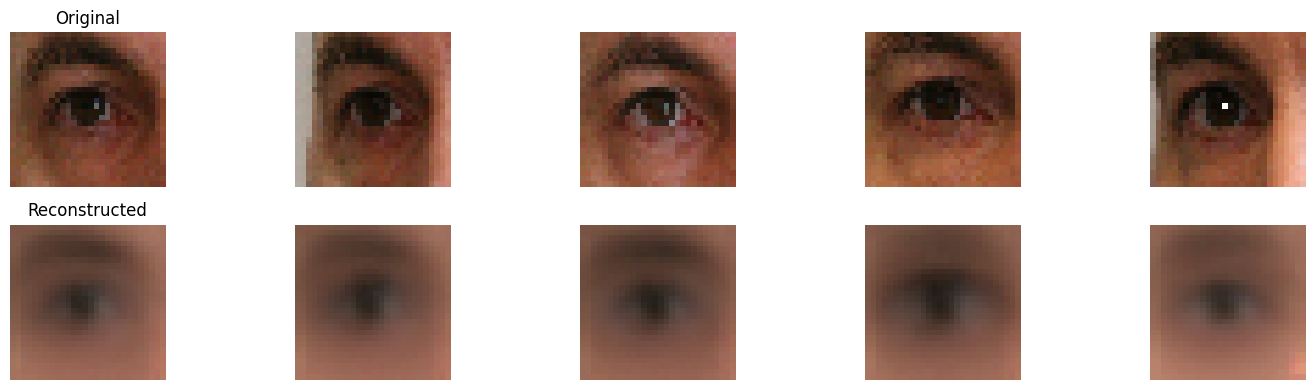


Interpolating between different eye colors...
Interpolating from brown to blue...
1/1 [==============================] - 0s 130ms/step
Interpolating from blue to hazel...
1/1 [==============================] - 0s 138ms/step
Interpolating from hazel to green...
1/1 [==============================] - 0s 148ms/step


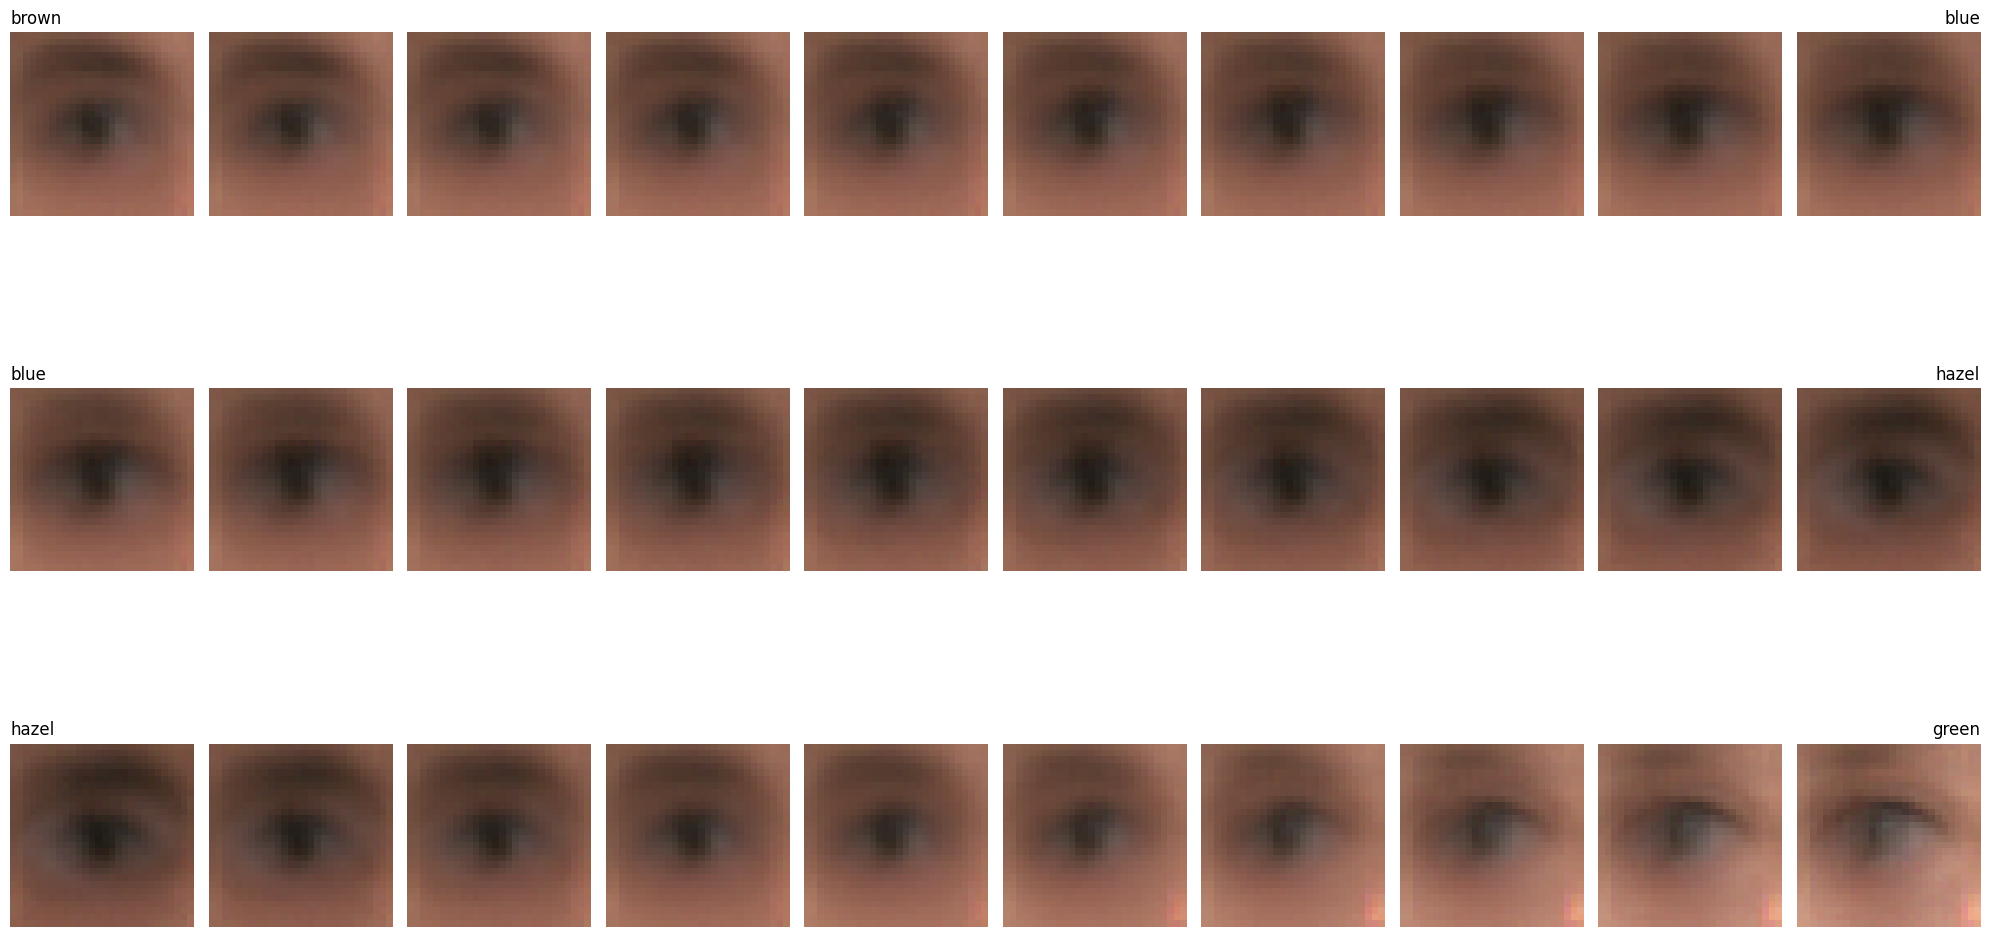

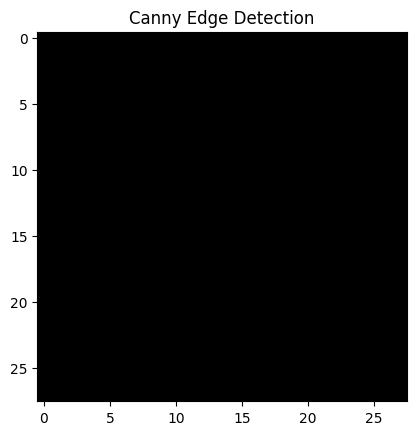

None detected


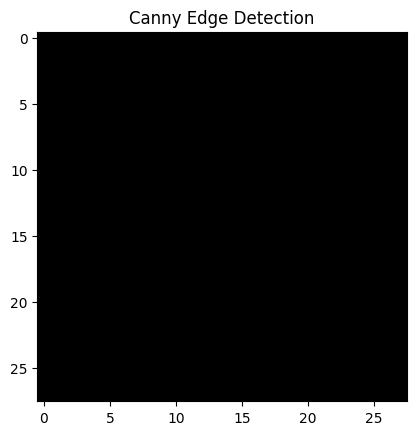

None detected


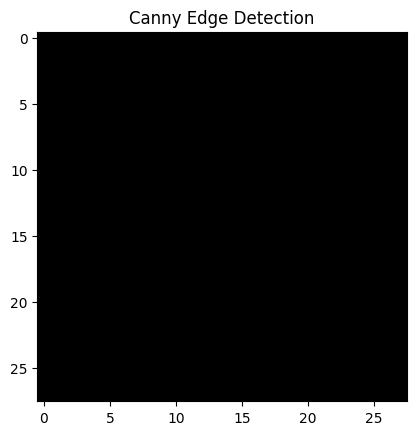

None detected


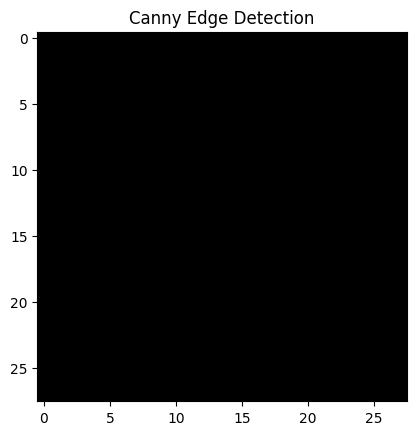

None detected


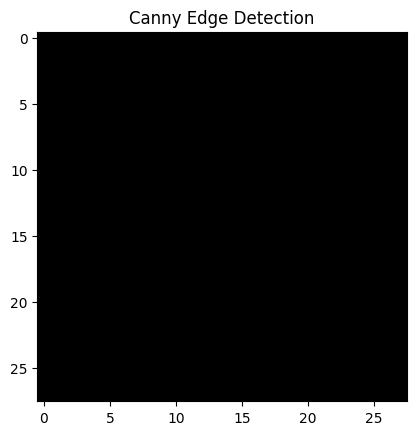

None detected


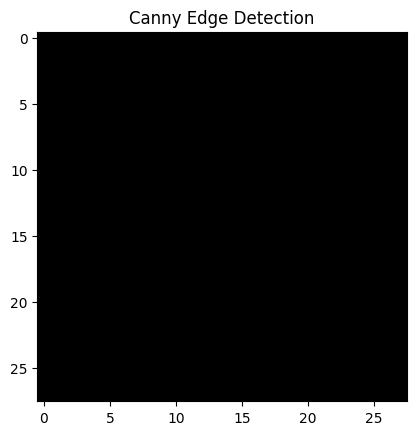

None detected


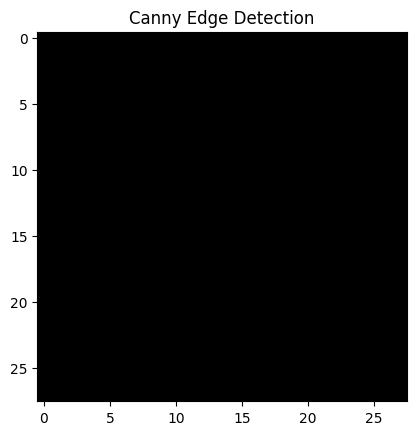

None detected


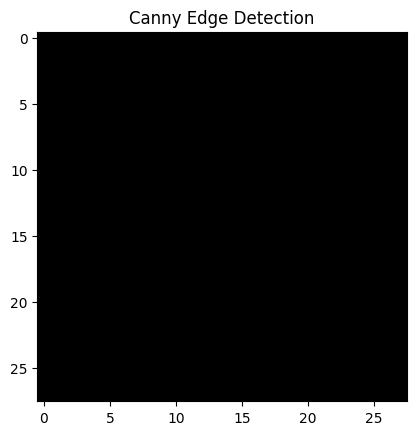

None detected


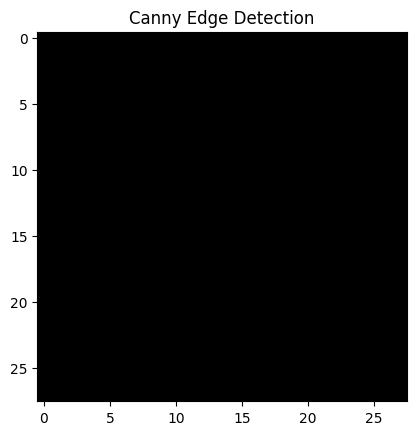

None detected


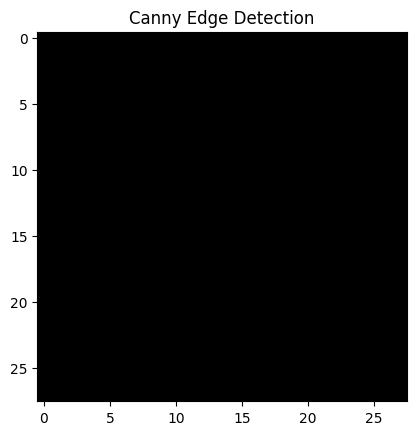

None detected


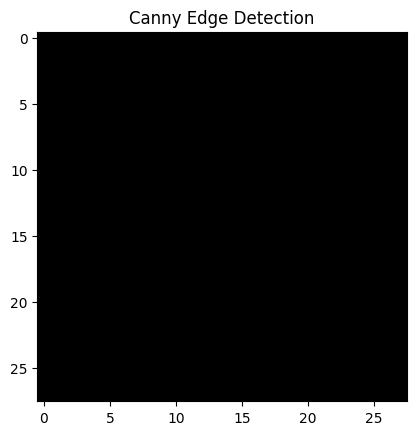

None detected


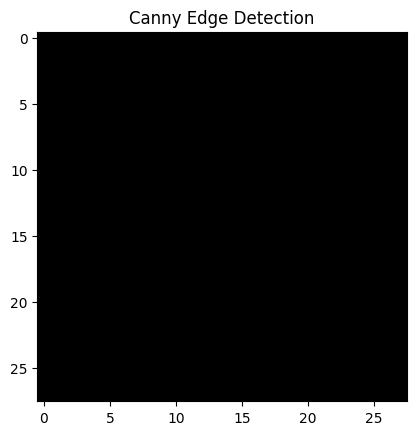

None detected


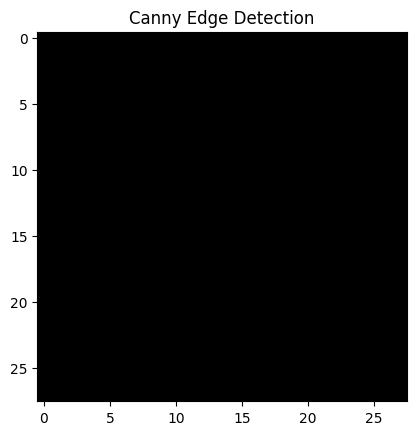

None detected


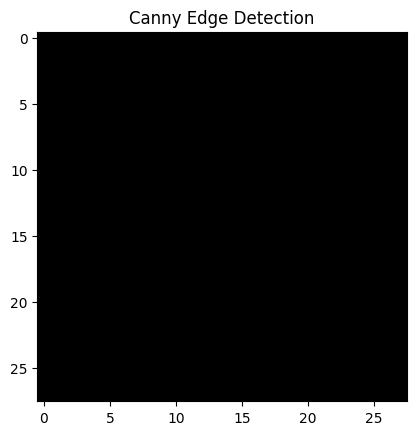

None detected


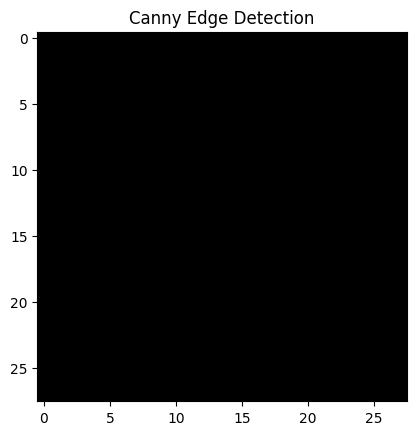

None detected


KeyboardInterrupt: 

In [ ]:
if __name__ == "__main__":
    # Load the labels
    labels_df = pd.read_csv('/content/drive/MyDrive/ML final project/datasets/iris_labels_full.csv')

    color_mapping = {
        'brown': [165, 42, 42],  # Example RGB for brown
        'blue': [0, 0, 255],    # Example RGB for blue
        'hazel': [184, 134, 11],  # Example RGB for hazel
        'green': [0, 128, 0]   # Example RGB for green
    }

    print("Reconstructing sample images...")
    reconstruct_images(latent_vectors)

    print("\nInterpolating between different eye colors...")
    #interpolate_color_sequence(decoder, latent_vectors, labels_df)
    #randomer_interpolater(decoder, latent_vectors, labels_df)

    interpolated_images, true_labels = interpolate_color_sequence(decoder, latent_vectors, labels_df)
    interpolation_accuracy = calculate_interpolation_accuracy(interpolated_images, true_labels, color_mapping)

    print("\nFinding best representative images for each color class...")
    find_best_representative_images(image_data, labels_df)

    print("\nExperimenting with hue...")
    #interpolate_and_apply_color_from_classes(find_best_representative_images(image_data, labels_df), image_data, labels_df)


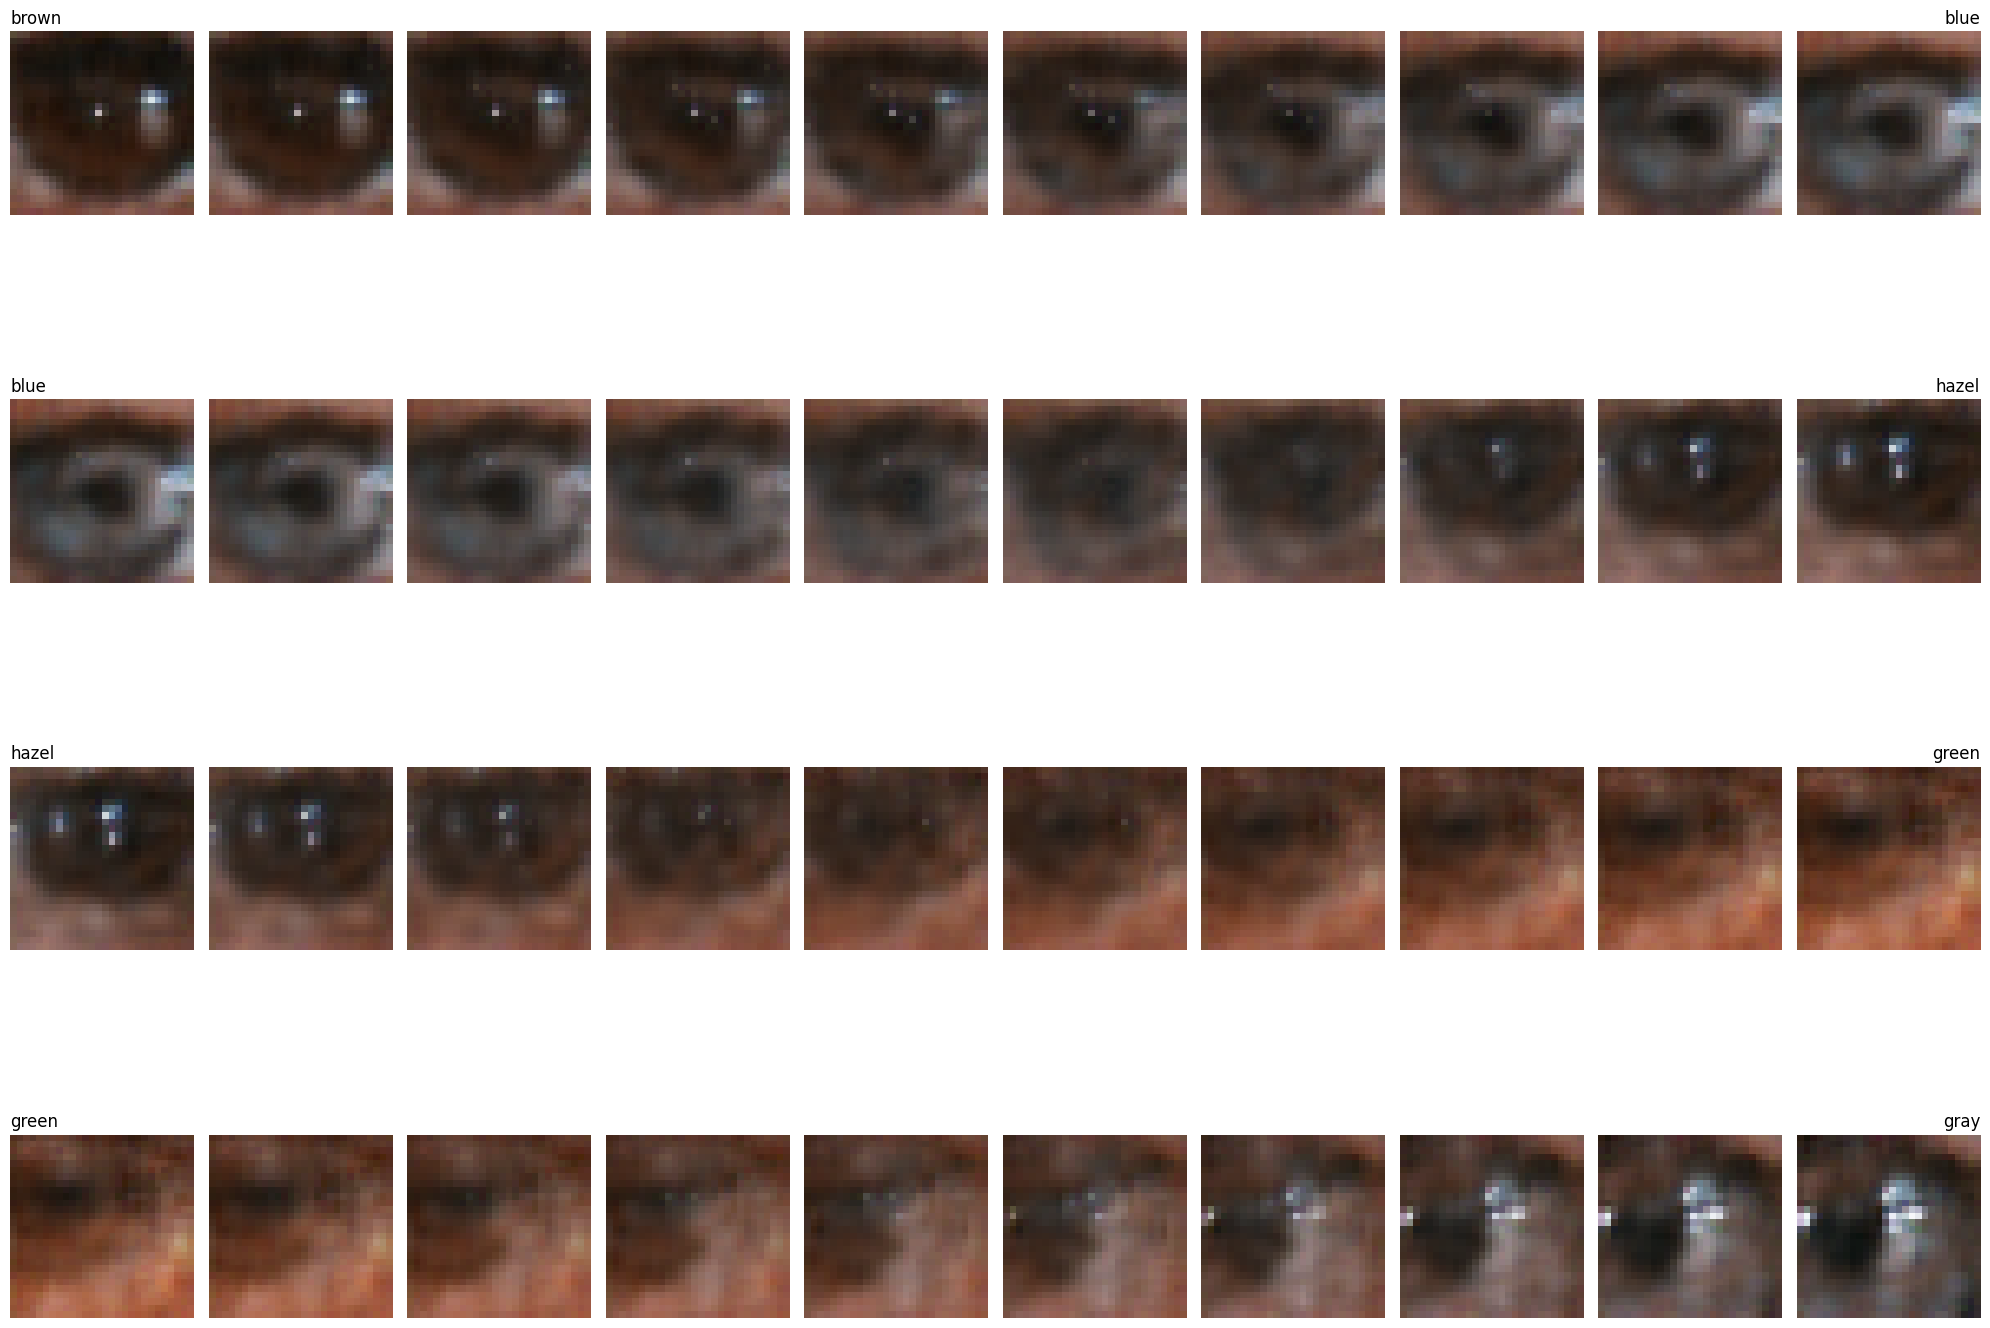

Below is testing for adding the hue of one eye to the image of another. The code was generated using Claude 3.5 Sonnet

In [ ]:


def detect_iris_boundaries_from_ref(image):
    #Detect iris and pupil boundaries using Hough circles
    # Convert image to grayscale and uint8
    gray = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Detect pupil (inner circle) first as it's more reliable
    pupil_circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=20,
        param1=50,  # Lower threshold for edge detection
        param2=30,  # Lower threshold for circle detection
        minRadius=1,
        maxRadius=5  # Adjusted for your image size
    )

    # Detect iris (outer circle)
    iris_circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=20,
        param1=50,
        param2=20,
        minRadius=10,
        maxRadius=14  # Adjusted for your image size
    )

    if iris_circles is None or pupil_circles is None:
        return None, None

    # Get the most prominent circles
    iris_circle = iris_circles[0][0]
    pupil_circle = pupil_circles[0][0]

    return iris_circle, pupil_circle

# Add a debug function to visualize the circle detection
def debug_circle_detection(image, save_path=None):
    iris_circle, pupil_circle = detect_iris_boundaries(image)
    if iris_circle is None or pupil_circle is None:
        print("No circles detected!")
        return

    # Create a copy for visualization
    debug_img = image.copy()

    # Draw iris circle
    cv2.circle(debug_img,
               (int(iris_circle[0]), int(iris_circle[1])),
               int(iris_circle[2]),
               (0, 255, 0), 1)  # Green for iris

    # Draw pupil circle
    cv2.circle(debug_img,
               (int(pupil_circle[0]), int(pupil_circle[1])),
               int(pupil_circle[2]),
               (255, 0, 0), 1)  # Blue for pupil

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(debug_img)
    plt.title('Detected Circles')
    plt.axis('off')

    if save_path:
        plt.savefig(save_path)
    plt.show()

# Add this to your main section to test the circle detection:
if __name__ == "__main__":
    # Test circle detection on first few images
    for i in range(5):
        print(f"\nTesting circle detection on image {i+1}")
        debug_circle_detection(image_data[i])




Testing circle detection on image 1


NameError: name 'detect_iris_boundaries' is not defined


Testing circle detection on image 1


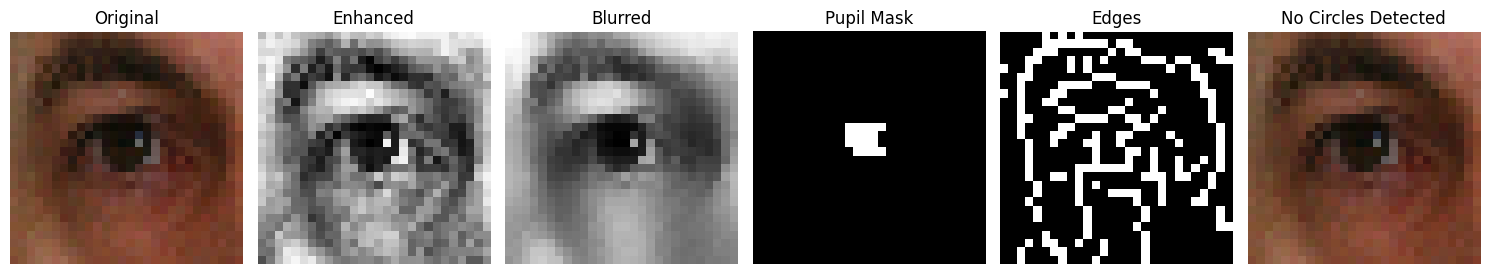


Testing circle detection on image 2


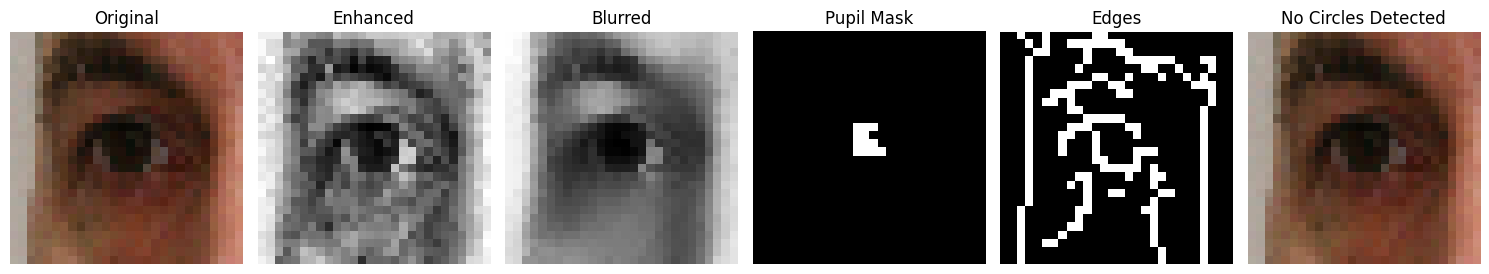


Testing circle detection on image 3


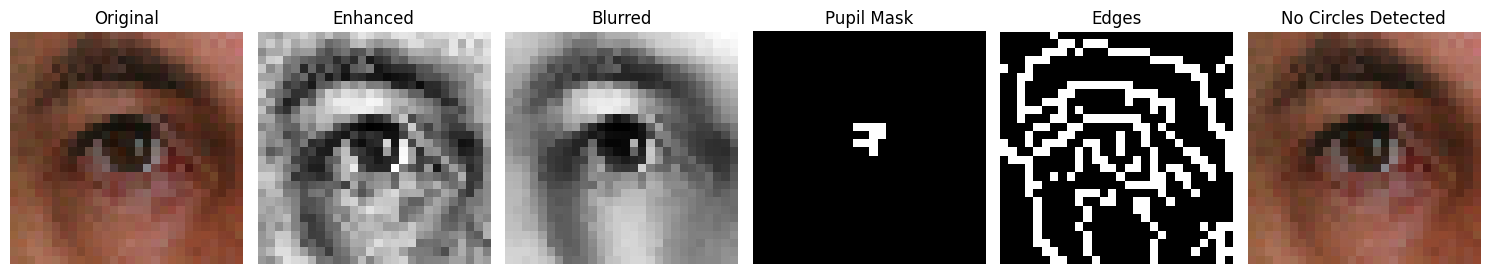


Testing circle detection on image 4


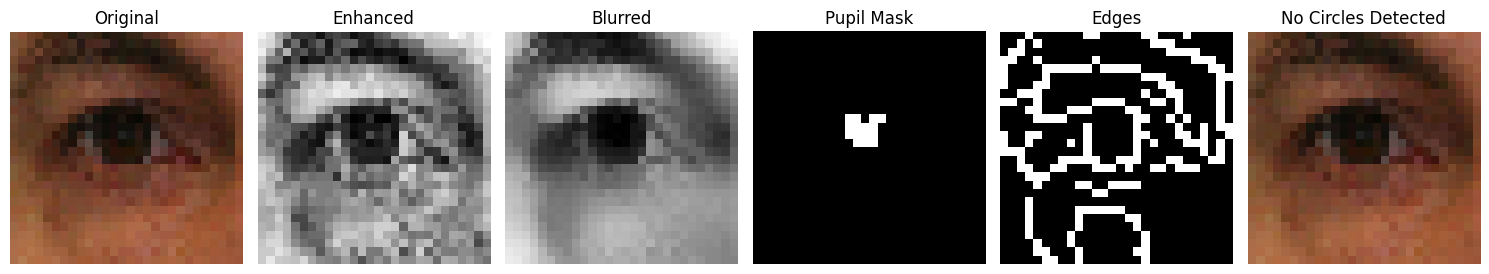


Testing circle detection on image 5


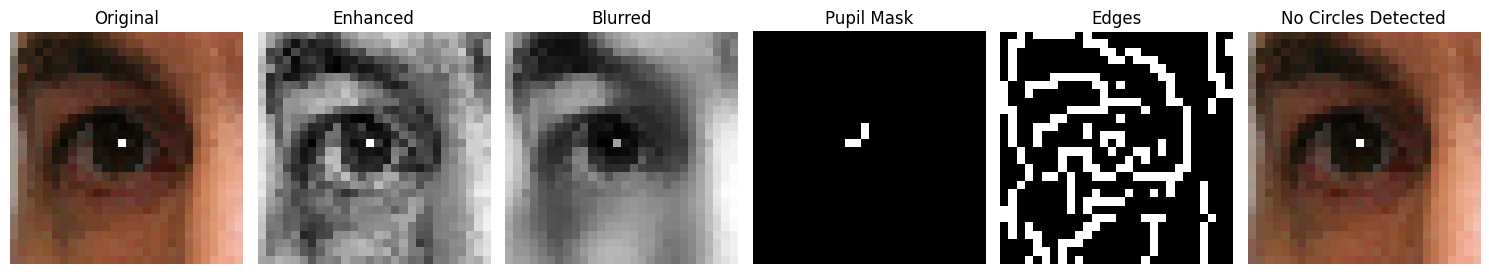

In [ ]:
def detect_iris_boundaries(image):
    """Detect iris and pupil boundaries using Hough circles"""
    # Convert image to grayscale and uint8
    gray = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)

    # Enhance contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
    enhanced = clahe.apply(gray)

    # Apply bilateral filter to reduce noise while preserving edges
    blurred = cv2.bilateralFilter(enhanced, 9, 75, 75)

    # Create a mask for the darkest regions (pupil)
    _, pupil_mask = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY_INV)

    # Detect pupil (inner circle)
    pupil_circles = cv2.HoughCircles(
        pupil_mask,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=10,
        param1=20,  # Lower threshold for edge detection
        param2=8,   # Much lower threshold for circle detection
        minRadius=2,
        maxRadius=6
    )

    # For iris detection, use edge detection
    edges = cv2.Canny(blurred, 30, 70)

    # Detect iris (outer circle)
    iris_circles = cv2.HoughCircles(
        edges,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=10,
        param1=20,
        param2=8,
        minRadius=8,
        maxRadius=13
    )

    if iris_circles is None or pupil_circles is None:
        return None, None

    # Get the most prominent circles
    iris_circle = iris_circles[0][0]
    pupil_circle = pupil_circles[0][0]

    return iris_circle, pupil_circle

def debug_circle_detection(image, save_path=None):
    """Visualize detected circles and preprocessing steps"""
    # Convert image to grayscale and uint8
    gray = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)

    # Enhance contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
    enhanced = clahe.apply(gray)

    # Apply bilateral filter
    blurred = cv2.bilateralFilter(enhanced, 9, 75, 75)

    # Create pupil mask
    _, pupil_mask = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY_INV)

    # Edge detection for iris
    edges = cv2.Canny(blurred, 30, 70)

    # Detect circles
    iris_circle, pupil_circle = detect_iris_boundaries(image)

    # Create visualization
    plt.figure(figsize=(15, 5))

    # Original image
    plt.subplot(1, 6, 1)
    plt.imshow(image)
    plt.title('Original')
    plt.axis('off')

    # Enhanced image
    plt.subplot(1, 6, 2)
    plt.imshow(enhanced, cmap='gray')
    plt.title('Enhanced')
    plt.axis('off')

    # Blurred image
    plt.subplot(1, 6, 3)
    plt.imshow(blurred, cmap='gray')
    plt.title('Blurred')
    plt.axis('off')

    # Pupil mask
    plt.subplot(1, 6, 4)
    plt.imshow(pupil_mask, cmap='gray')
    plt.title('Pupil Mask')
    plt.axis('off')

    # Edge detection
    plt.subplot(1, 6, 5)
    plt.imshow(edges, cmap='gray')
    plt.title('Edges')
    plt.axis('off')

    # Final result with circles
    result_img = image.copy()
    if iris_circle is not None and pupil_circle is not None:
        # Draw iris circle
        cv2.circle(result_img,
                   (int(iris_circle[0]), int(iris_circle[1])),
                   int(iris_circle[2]),
                   (0, 1, 0), 1)  # Green for iris

        # Draw pupil circle
        cv2.circle(result_img,
                   (int(pupil_circle[0]), int(pupil_circle[1])),
                   int(pupil_circle[2]),
                   (1, 0, 0), 1)  # Blue for pupil

        plt.subplot(1, 6, 6)
        plt.imshow(result_img)
        plt.title('Detected Circles')
        plt.axis('off')
    else:
        plt.subplot(1, 6, 6)
        plt.imshow(image)
        plt.title('No Circles Detected')
        plt.axis('off')

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

# Add this to your main section to test:
if __name__ == "__main__":
    # Test circle detection on first few images
    for i in range(5):
        print(f"\nTesting circle detection on image {i+1}")
        debug_circle_detection(image_data[i])


Testing circle detection on image 1


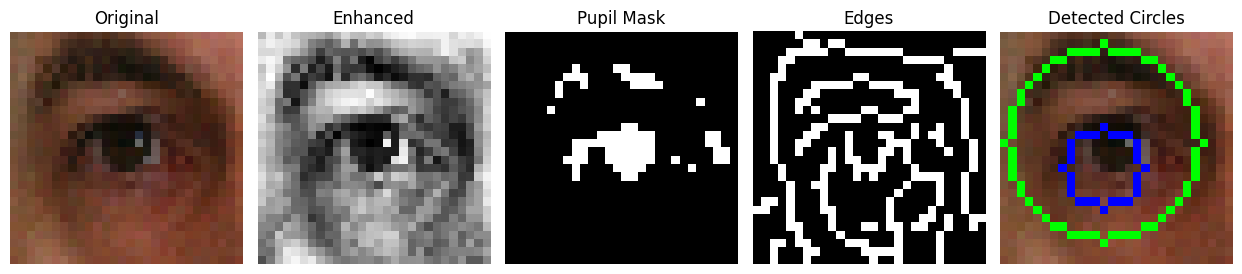


Testing circle detection on image 2


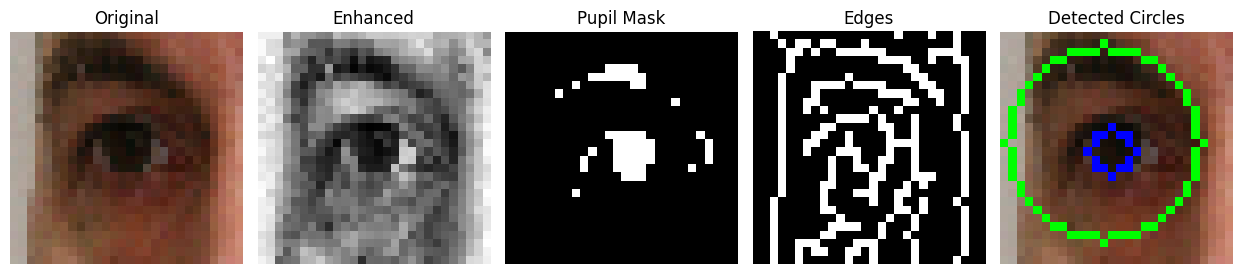


Testing circle detection on image 3


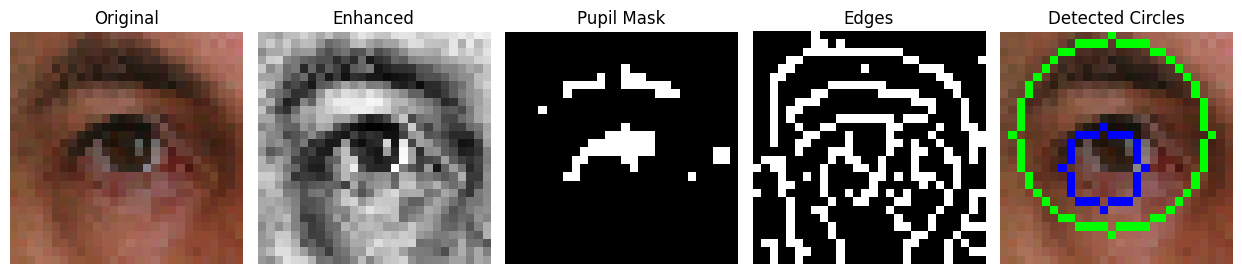


Testing circle detection on image 4


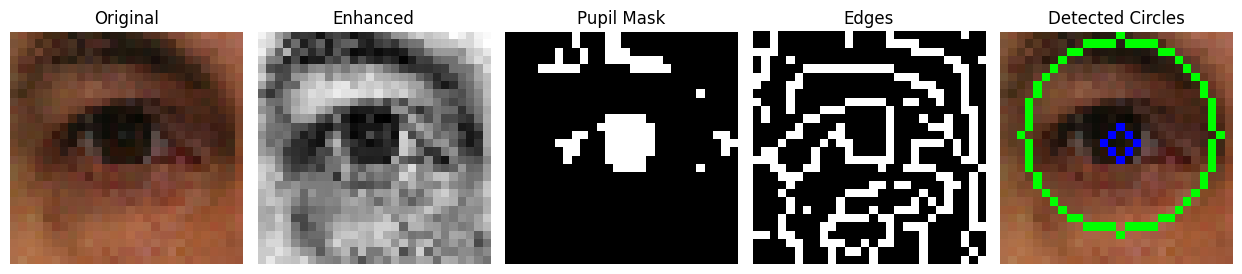


Testing circle detection on image 5


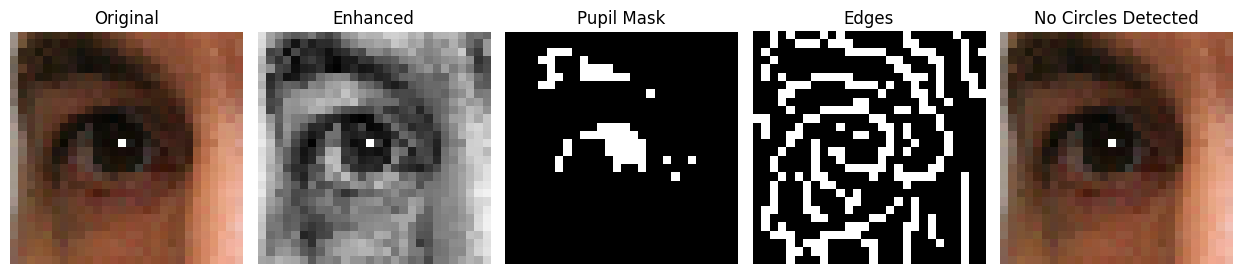

In [ ]:
def detect_iris_boundaries2(image):
    """Detect iris and pupil boundaries using Hough circles"""
    # Convert image to grayscale and uint8
    gray = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)

    # Enhance contrast
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(4,4))
    enhanced = clahe.apply(gray)

    # First phase: Pupil detection
    # Create a binary mask for the pupil (darkest region)
    _, pupil_mask = cv2.threshold(enhanced, 40, 255, cv2.THRESH_BINARY_INV)
    # Clean up the mask
    kernel = np.ones((2,2), np.uint8)
    pupil_mask = cv2.morphologyEx(pupil_mask, cv2.MORPH_CLOSE, kernel)

    # Detect pupil
    pupil_circles = cv2.HoughCircles(
        pupil_mask,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=5,
        param1=15,    # Even lower threshold
        param2=5,     # Much lower threshold
        minRadius=2,
        maxRadius=6
    )

    # Second phase: Iris detection
    # Create a mask for the iris region
    blur = cv2.GaussianBlur(enhanced, (5,5), 0)
    edges = cv2.Canny(blur, 20, 60)

    # Detect iris
    iris_circles = cv2.HoughCircles(
        edges,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=5,
        param1=15,
        param2=5,
        minRadius=7,
        maxRadius=13
    )

    if iris_circles is None or pupil_circles is None:
        # Try alternative parameters for iris if initial detection failed
        iris_circles = cv2.HoughCircles(
            enhanced,  # Try on enhanced image instead of edges
            cv2.HOUGH_GRADIENT,
            dp=1,
            minDist=5,
            param1=15,
            param2=5,
            minRadius=7,
            maxRadius=13
        )

        if iris_circles is None or pupil_circles is None:
            return None, None

    # Get the most prominent circles
    iris_circle = iris_circles[0][0]
    pupil_circle = pupil_circles[0][0]

    # Validate circles
    # Ensure pupil is inside iris
    pupil_x, pupil_y = pupil_circle[0], pupil_circle[1]
    iris_x, iris_y = iris_circle[0], iris_circle[1]
    distance = np.sqrt((pupil_x - iris_x)**2 + (pupil_y - iris_y)**2)

    if distance > iris_circle[2] - pupil_circle[2]:
        return None, None

    return iris_circle, pupil_circle

def debug_circle_detection(image, save_path=None):
    """Visualize detected circles and preprocessing steps"""
    # Previous preprocessing steps remain the same...
    gray = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(4,4))
    enhanced = clahe.apply(gray)
    _, pupil_mask = cv2.threshold(enhanced, 40, 255, cv2.THRESH_BINARY_INV)
    kernel = np.ones((2,2), np.uint8)
    pupil_mask = cv2.morphologyEx(pupil_mask, cv2.MORPH_CLOSE, kernel)
    blur = cv2.GaussianBlur(enhanced, (5,5), 0)
    edges = cv2.Canny(blur, 20, 60)

    # Detect circles
    iris_circle, pupil_circle = detect_iris_boundaries2(image)

    # Create visualization
    plt.figure(figsize=(15, 5))

    # Original image
    plt.subplot(1, 6, 1)
    plt.imshow(image)
    plt.title('Original')
    plt.axis('off')

    # Enhanced image
    plt.subplot(1, 6, 2)
    plt.imshow(enhanced, cmap='gray')
    plt.title('Enhanced')
    plt.axis('off')

    # Pupil mask
    plt.subplot(1, 6, 3)
    plt.imshow(pupil_mask, cmap='gray')
    plt.title('Pupil Mask')
    plt.axis('off')

    # Edge detection
    plt.subplot(1, 6, 4)
    plt.imshow(edges, cmap='gray')
    plt.title('Edges')
    plt.axis('off')

    # Final result with circles
    result_img = image.copy()
    if iris_circle is not None and pupil_circle is not None:
        # Draw iris circle
        cv2.circle(result_img,
                   (int(iris_circle[0]), int(iris_circle[1])),
                   int(iris_circle[2]),
                   (0, 1, 0), 1)  # Green for iris

        # Draw pupil circle
        cv2.circle(result_img,
                   (int(pupil_circle[0]), int(pupil_circle[1])),
                   int(pupil_circle[2]),
                   (0, 0, 1), 1)  # Blue for pupil

        plt.subplot(1, 6, 5)
        plt.imshow(result_img)
        plt.title('Detected Circles')
        plt.axis('off')
    else:
        plt.subplot(1, 6, 5)
        plt.imshow(image)
        plt.title('No Circles Detected')
        plt.axis('off')

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

if __name__ == "__main__":
    # Test circle detection on first few images
    for i in range(5):
        print(f"\nTesting circle detection on image {i+1}")
        debug_circle_detection(image_data[i])

Loading reference images...

Testing iris unwrapping...


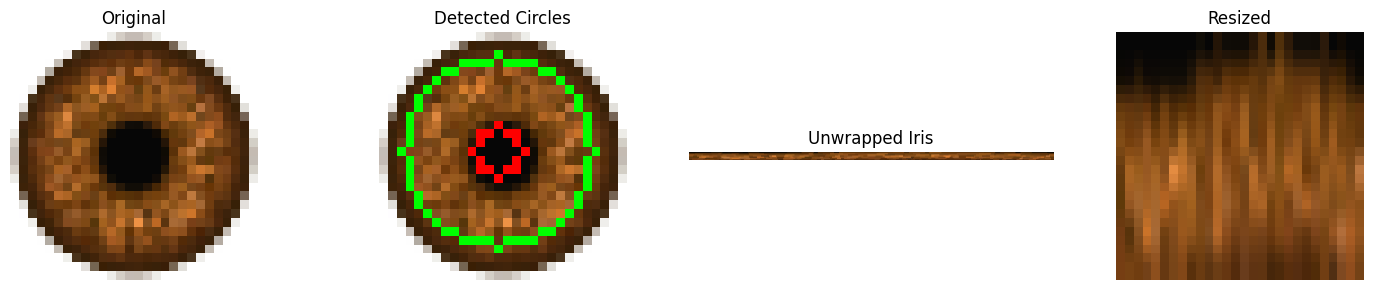

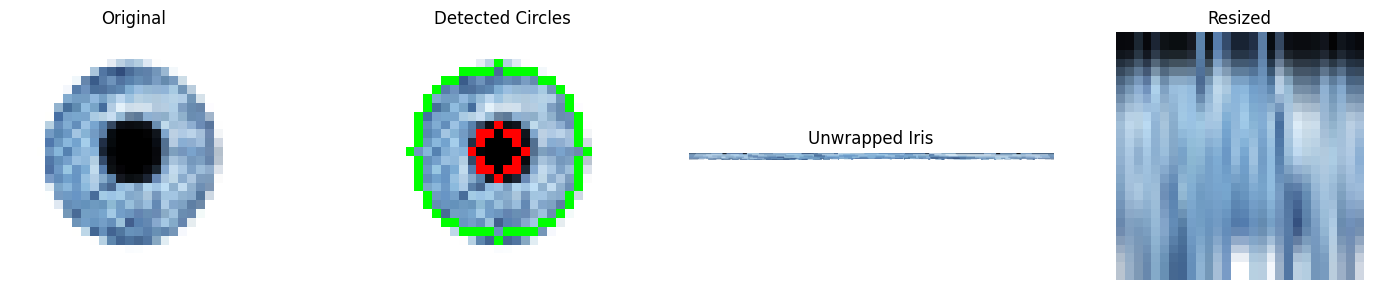

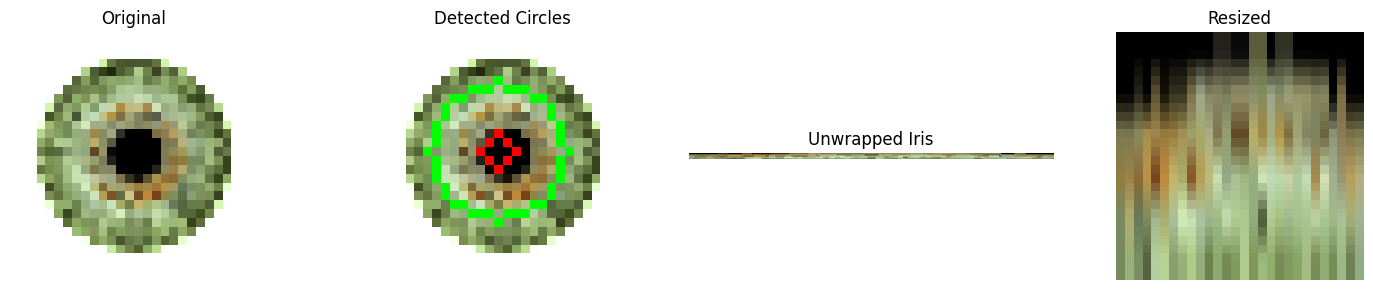

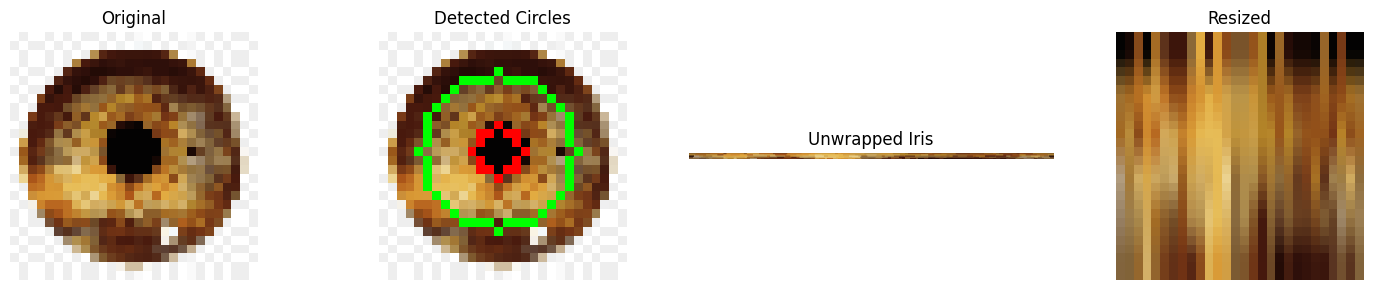

In [ ]:
def detect_iris_boundaries(image):
    """Detect iris and pupil boundaries using Hough circles"""
    # Convert image to grayscale and uint8
    gray = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)

    # Enhance contrast
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(4,4))
    enhanced = clahe.apply(gray)

    # First phase: Pupil detection
    # Create a binary mask for the pupil (darkest region)
    _, pupil_mask = cv2.threshold(enhanced, 40, 255, cv2.THRESH_BINARY_INV)
    kernel = np.ones((1,1), np.uint8)
    pupil_mask = cv2.morphologyEx(pupil_mask, cv2.MORPH_CLOSE, kernel)

    # Find contours in pupil mask
    contours, _ = cv2.findContours(pupil_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        return None, None

    # Find the largest contour (should be the pupil)
    pupil_contour = max(contours, key=cv2.contourArea)

    # Fit circle to pupil contour
    (pupil_x, pupil_y), pupil_radius = cv2.minEnclosingCircle(pupil_contour)

    # Second phase: Iris detection
    # Create a larger circle around the pupil for the iris
    iris_radius = pupil_radius * 3.0  # Typical iris radius is about 2.5 times pupil radius
    iris_x, iris_y = pupil_x, pupil_y

    # Validate circles
    if (pupil_radius < 2 or pupil_radius > 6 or
        iris_radius < 7 or iris_radius > 13):
        return None, None

    return ([iris_x, iris_y, iris_radius], [pupil_x, pupil_y, pupil_radius])

def unwrap_iris(image, iris_circle, pupil_circle):
    """Unwrap iris region to rectangular form"""
    center_x, center_y = int(iris_circle[0]), int(iris_circle[1])
    iris_radius = int(iris_circle[2])
    pupil_radius = int(pupil_circle[2])

    # Create unwrapped image
    unwrapped_height = int(iris_radius - pupil_radius)
    unwrapped_width = 360  # One degree per pixel
    unwrapped = np.zeros((unwrapped_height, unwrapped_width, 3))

    # Create coordinate maps for vectorized operation
    theta = np.linspace(0, 2*np.pi, unwrapped_width)
    r = np.linspace(pupil_radius, iris_radius, unwrapped_height)
    theta_grid, r_grid = np.meshgrid(theta, r)

    # Calculate x and y coordinates
    x_grid = center_x + r_grid * np.cos(theta_grid)
    y_grid = center_y + r_grid * np.sin(theta_grid)

    # Round coordinates and ensure they're within bounds
    x_grid = np.clip(np.round(x_grid), 0, image.shape[1]-1).astype(int)
    y_grid = np.clip(np.round(y_grid), 0, image.shape[0]-1).astype(int)

    # Map pixels
    for c in range(3):  # For each color channel
        unwrapped[:, :, c] = image[:, :, c][y_grid, x_grid]

    return unwrapped

def debug_unwrap(image, save_path=None):
    """Debug visualization for iris unwrapping process"""
    # Detect circles
    iris_circle, pupil_circle = detect_iris_boundaries(image)

    plt.figure(figsize=(15, 3))

    # Original image with circles
    plt.subplot(1, 4, 1)
    plt.imshow(image)
    plt.title('Original')
    plt.axis('off')

    if iris_circle is not None and pupil_circle is not None:
        # Draw circles on copy of original
        marked = image.copy()
        cv2.circle(marked,
                  (int(iris_circle[0]), int(iris_circle[1])),
                  int(iris_circle[2]),
                  (0, 1, 0), 1)
        cv2.circle(marked,
                  (int(pupil_circle[0]), int(pupil_circle[1])),
                  int(pupil_circle[2]),
                  (1, 0, 0), 1)

        plt.subplot(1, 4, 2)
        plt.imshow(marked)
        plt.title('Detected Circles')
        plt.axis('off')

        # Unwrap iris
        unwrapped = unwrap_iris(image, iris_circle, pupil_circle)
        plt.subplot(1, 4, 3)
        plt.imshow(unwrapped)
        plt.title('Unwrapped Iris')
        plt.axis('off')

        # Resize for encoder
        resized = cv2.resize(unwrapped, (28, 28))
        plt.subplot(1, 4, 4)
        plt.imshow(resized)
        plt.title('Resized')
        plt.axis('off')
    else:
        plt.subplot(1, 4, 2)
        plt.text(0.5, 0.5, 'No circles detected', ha='center', va='center')
        plt.axis('off')

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

    return iris_circle is not None and pupil_circle is not None

# Add to main section:
if __name__ == "__main__":

    reference_paths = {
        'brown': '/content/drive/MyDrive/ML final project/color_ref/browneye2.jpg',
        'blue': '/content/drive/MyDrive/ML final project/color_ref/blueeye.jpg',
        'green': '/content/drive/MyDrive/ML final project/color_ref/greeneye.jpg',
        'hazel': '/content/drive/MyDrive/ML final project/color_ref/hazeleye2.jpg'
    }

    print("Loading reference images...")
    reference_images = load_reference_images(reference_paths)

    print("\nTesting iris unwrapping...")
    #for i in range(5):
    for color, image in reference_images.items():
        #print(f"\nProcessing image {image}")
        success = debug_unwrap(image)
        if not success:
            print("Failed to detect circles")

In [ ]:
def unwrap_iris(image, iris_circle, pupil_circle):
    """Unwrap iris region to rectangular form"""
    center_x, center_y = int(iris_circle[0]), int(iris_circle[1])
    iris_radius = int(iris_circle[2])
    pupil_radius = int(pupil_circle[2])

    # Create unwrapped image
    unwrapped_height = iris_radius - pupil_radius
    unwrapped_width = 360  # One degree per pixel
    unwrapped = np.zeros((unwrapped_height, unwrapped_width, 3))

    for r in range(unwrapped_height):
        for theta in range(unwrapped_width):
            radius = pupil_radius + r
            angle = np.deg2rad(theta)
            x = int(center_x + radius * np.cos(angle))
            y = int(center_y + radius * np.sin(angle))

            if 0 <= x < image.shape[1] and 0 <= y < image.shape[0]:
                unwrapped[r, theta] = image[y, x]

    return unwrapped

In [ ]:
def extract_iris_colors(image_data, encoder):
    """Extract iris colors from images and encode them"""
    color_vectors = {}

    for i, img in enumerate(image_data):
        # Detect iris boundaries
        iris_circle, pupil_circle = detect_iris_boundaries(img)
        if iris_circle is None or pupil_circle is None:
            continue

        # Unwrap iris
        unwrapped_iris = unwrap_iris(img, iris_circle, pupil_circle)

        # Resize unwrapped iris to match encoder input size
        resized_iris = cv2.resize(unwrapped_iris, (28, 28))

        # Get latent vector
        latent_vector = encoder.predict(np.expand_dims(resized_iris, 0))[0]

        # Store vector based on color class
        color = labels_df.iloc[i]['label']
        if color not in color_vectors:
            color_vectors[color] = []
        color_vectors[color].append(latent_vector)

    # Average vectors for each color
    averaged_vectors = {
        color: np.mean(vectors, axis=0)
        for color, vectors in color_vectors.items()
    }

    return averaged_vectors


In [ ]:
def apply_iris_color(target_image, desired_color, color_vectors, decoder, intensity=1.0):
    """Apply specified iris color to target image"""
    # Detect iris in target image
    iris_circle, pupil_circle = detect_iris_boundaries(target_image)
    if iris_circle is None or pupil_circle is None:
        return target_image

    # Get color vector
    if desired_color not in color_vectors:
        raise ValueError(f"Color {desired_color} not found in dataset")
    color_vector = color_vectors[desired_color]

    # Generate colored iris using decoder
    colored_iris = decoder.predict(np.expand_dims(color_vector, 0))[0]

    # Create mask for iris region
    mask = np.zeros_like(target_image)
    cv2.circle(mask, (int(iris_circle[0]), int(iris_circle[1])),
              int(iris_circle[2]), (1, 1, 1), -1)
    cv2.circle(mask, (int(pupil_circle[0]), int(pupil_circle[1])),
              int(pupil_circle[2]), (0, 0, 0), -1)

    # Blend original and colored image
    result = target_image.copy()
    colored_resized = cv2.resize(colored_iris, (target_image.shape[1], target_image.shape[0]))
    result = (1 - intensity) * result + intensity * (colored_resized * mask + result * (1 - mask))

    return result

In [ ]:
def apply_iris_color(target_image, desired_color, color_vectors, decoder, intensity=0.7):
    """Apply specified iris color to target image with visualization"""
    # Create figure for visualization
    plt.figure(figsize=(20, 4))
    current_plot = 1

    # Show original image
    plt.subplot(1, 5, current_plot)
    plt.imshow(target_image)
    plt.title('Original')
    plt.axis('off')
    current_plot += 1

    # Detect iris boundaries
    iris_circle, pupil_circle = detect_iris_boundaries(target_image)
    if iris_circle is None or pupil_circle is None:
        print("No circles detected!")
        return target_image

    # Create visualization of detected circles
    circles_img = target_image.copy()
    cv2.circle(circles_img,
               (int(iris_circle[0]), int(iris_circle[1])),
               int(iris_circle[2]),
               (0, 1, 0), 1)  # Green for iris
    cv2.circle(circles_img,
               (int(pupil_circle[0]), int(pupil_circle[1])),
               int(pupil_circle[2]),
               (1, 0, 0), 1)  # Blue for pupil

    plt.subplot(1, 5, current_plot)
    plt.imshow(circles_img)
    plt.title('Detected Circles')
    plt.axis('off')
    current_plot += 1

    # Get color vector and generate colored iris
    if desired_color not in color_vectors:
        raise ValueError(f"Color {desired_color} not found in dataset")
    color_vector = color_vectors[desired_color]
    colored_iris = decoder.predict(np.expand_dims(color_vector, 0))[0]

    # Show generated color pattern
    plt.subplot(1, 5, current_plot)
    plt.imshow(colored_iris)
    plt.title('Generated Color Pattern')
    plt.axis('off')
    current_plot += 1

    # Create masks for iris and pupil regions
    mask = np.zeros_like(target_image)
    cv2.circle(mask,
              (int(iris_circle[0]), int(iris_circle[1])),
              int(iris_circle[2]),
              (1, 1, 1), -1)
    cv2.circle(mask,
              (int(pupil_circle[0]), int(pupil_circle[1])),
              int(pupil_circle[2]),
              (0, 0, 0), -1)

    # Show mask
    plt.subplot(1, 5, current_plot)
    plt.imshow(mask)
    plt.title('Blend Mask')
    plt.axis('off')
    current_plot += 1

    # Blend images
    result = target_image.copy()
    colored_resized = cv2.resize(colored_iris, (target_image.shape[1], target_image.shape[0]))

    # Modify blending to preserve more of the original texture
    # Convert to HSV for better color blending
    original_hsv = cv2.cvtColor((target_image * 255).astype(np.uint8), cv2.COLOR_RGB2HSV)
    colored_hsv = cv2.cvtColor((colored_resized * 255).astype(np.uint8), cv2.COLOR_RGB2HSV)

    # Only blend the hue and saturation channels
    result_hsv = original_hsv.copy()
    result_hsv[..., 0] = cv2.addWeighted(original_hsv[..., 0], 1 - intensity,
                                        colored_hsv[..., 0], intensity, 0)
    result_hsv[..., 1] = cv2.addWeighted(original_hsv[..., 1], 1 - intensity,
                                        colored_hsv[..., 1], intensity, 0)

    # Convert back to RGB
    result = cv2.cvtColor(result_hsv, cv2.COLOR_HSV2RGB) / 255.0

    # Apply mask
    result = result * mask + target_image * (1 - mask)

    # Show final result
    plt.subplot(1, 5, current_plot)
    plt.imshow(result)
    plt.title('Final Result')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return result

# Add visualization for extract_iris_colors function
def extract_iris_colors(image_data, encoder, labels_df, debug=False):
    """Extract iris colors from images and encode them with visualization"""
    color_vectors = {}

    for i, img in enumerate(image_data):
        if debug and i < 5:  # Show process for first 5 images
            plt.figure(figsize=(15, 3))
            plt.subplot(1, 4, 1)
            plt.imshow(img)
            plt.title('Original')
            plt.axis('off')

        # Detect iris boundaries
        iris_circle, pupil_circle = detect_iris_boundaries(img)
        if iris_circle is None or pupil_circle is None:
            continue

        # Unwrap iris
        unwrapped_iris = unwrap_iris(img, iris_circle, pupil_circle)

        if debug and i < 5:
            plt.subplot(1, 4, 2)
            plt.imshow(unwrapped_iris)
            plt.title('Unwrapped Iris')
            plt.axis('off')

        # Resize unwrapped iris
        resized_iris = cv2.resize(unwrapped_iris, (28, 28))

        if debug and i < 5:
            plt.subplot(1, 4, 3)
            plt.imshow(resized_iris)
            plt.title('Resized')
            plt.axis('off')

        # Get latent vector
        latent_vector = encoder.predict(np.expand_dims(resized_iris, 0))[0]

        # Store vector based on color class
        color = labels_df.iloc[i]['label']
        if color not in color_vectors:
            color_vectors[color] = []
        color_vectors[color].append(latent_vector)

        if debug and i < 5:
            # Visualize reconstruction from latent vector
            reconstructed = decoder.predict(np.expand_dims(latent_vector, 0))[0]
            plt.subplot(1, 4, 4)
            plt.imshow(reconstructed)
            plt.title('Reconstructed')
            plt.axis('off')
            plt.show()

    # Average vectors for each color
    averaged_vectors = {
        color: np.mean(vectors, axis=0)
        for color, vectors in color_vectors.items()
    }

    return averaged_vectors

# In your main section:
"""
if __name__ == "__main__":
    print("\nExtracting iris colors with visualization...")
    color_vectors = extract_iris_colors(image_data, encoder, labels_df, debug=True)

    print("\nTesting color application with visualization...")
    sample_image = image_data[0]
    for color in ['blue', 'green', 'brown', 'hazel']:
        print(f"\nApplying {color} color...")
        colored_image = apply_iris_color(sample_image, color, color_vectors, decoder, intensity=0.7)
"""

'\nif __name__ == "__main__":\n    print("\nExtracting iris colors with visualization...")\n    color_vectors = extract_iris_colors(image_data, encoder, labels_df, debug=True)\n\n    print("\nTesting color application with visualization...")\n    sample_image = image_data[0]\n    for color in [\'blue\', \'green\', \'brown\', \'hazel\']:\n        print(f"\nApplying {color} color...")\n        colored_image = apply_iris_color(sample_image, color, color_vectors, decoder, intensity=0.7)\n'


Extracting iris colors...
1/1 [==============================] - 0s 28ms/step


InvalidArgumentError: Graph execution error:

Detected at node 'decoder/dense/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
      ColabKernelApp.launch_instance()
    File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback
      ret = callback()
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner
      self.ctx_run(self.run)
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run
      yielded = self.gen.send(value)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
      self.do_execute(
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
      result = self._run_cell(
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
      return runner(coro)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-173-a2f7632e358e>", line 7, in <cell line: 1>
      color_vectors = extract_iris_colors(image_data, encoder, labels_df, debug=True)
    File "<ipython-input-172-bd36d1d25384>", line 148, in extract_iris_colors
      reconstructed = decoder.predict(np.expand_dims(latent_vector, 0))[0]
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2350, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2137, in predict_function
      return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2123, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2111, in run_step
      outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2079, in predict_step
      return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/layers/core/dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "/usr/local/lib/python3.10/dist-packages/keras/activations.py", line 317, in relu
      return backend.relu(
    File "/usr/local/lib/python3.10/dist-packages/keras/backend.py", line 5369, in relu
      x = tf.nn.relu(x)
Node: 'decoder/dense/Relu'
Matrix size-incompatible: In[0]: [1,64], In[1]: [4,100352]
	 [[{{node decoder/dense/Relu}}]] [Op:__inference_predict_function_13598]

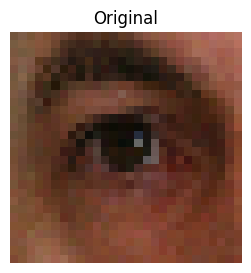

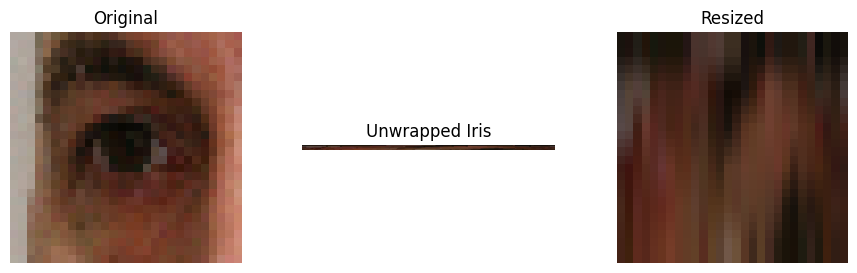

In [ ]:
if __name__ == "__main__":
    # ... existing code ...

    print("\nExtracting iris colors...")
    #color_vectors = extract_iris_colors(image_data, encoder)

    color_vectors = extract_iris_colors(image_data, encoder, labels_df, debug=True)

    print("\nTesting color application...")
    # Test on a sample image
    sample_image = image_data[0]
    #colored_image = apply_iris_color(sample_image, 'blue', color_vectors, decoder, intensity=0.7)

    for color in ['blue', 'green', 'brown', 'hazel']:
      print(f"\nApplying {color} color...")
      colored_image = apply_iris_color(sample_image, color, color_vectors, decoder, intensity=0.7)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(sample_image)
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(colored_image)
    plt.title('Color Applied')
    plt.axis('off')
    plt.show()

In [ ]:
def detect_iris_boundaries_simple(image):
    """Simplified circle detection for preprocessed reference images"""
    # Convert image to grayscale
    if len(image.shape) == 3:
        gray = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    else:
        gray = (image * 255).astype(np.uint8)

    # Find center of the image
    center_x = image.shape[1] // 2
    center_y = image.shape[0] // 2

    # Create binary masks for pupil and iris
    _, pupil_mask = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY_INV)
    _, iris_mask = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

    # Find pupil radius
    pupil_points = np.where(pupil_mask > 0)
    if len(pupil_points[0]) == 0:
        return None, None

    pupil_radius = np.mean(np.sqrt(
        (pupil_points[1] - center_x)**2 +
        (pupil_points[0] - center_y)**2
    )) * 0.7  # Adjust factor as needed

    # Find iris radius
    iris_points = np.where(iris_mask > 0)
    if len(iris_points[0]) == 0:
        return None, None

    iris_radius = np.mean(np.sqrt(
        (iris_points[1] - center_x)**2 +
        (iris_points[0] - center_y)**2
    )) * 0.9  # Adjust factor as needed

    # Create circle parameters
    iris_circle = [center_x, center_y, iris_radius]
    pupil_circle = [center_x, center_y, pupil_radius]

    return iris_circle, pupil_circle

Loading reference images...

Extracting color vectors from reference images...

Processing brown reference image...
1/1 [==============================] - 0s 69ms/step


InvalidArgumentError: Graph execution error:

Detected at node 'decoder/dense/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
      ColabKernelApp.launch_instance()
    File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback
      ret = callback()
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner
      self.ctx_run(self.run)
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run
      yielded = self.gen.send(value)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
      self.do_execute(
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
      result = self._run_cell(
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
      return runner(coro)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-173-a2f7632e358e>", line 7, in <cell line: 1>
      color_vectors = extract_iris_colors(image_data, encoder, labels_df, debug=True)
    File "<ipython-input-172-bd36d1d25384>", line 148, in extract_iris_colors
      reconstructed = decoder.predict(np.expand_dims(latent_vector, 0))[0]
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2350, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2137, in predict_function
      return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2123, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2111, in run_step
      outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2079, in predict_step
      return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/layers/core/dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "/usr/local/lib/python3.10/dist-packages/keras/activations.py", line 317, in relu
      return backend.relu(
    File "/usr/local/lib/python3.10/dist-packages/keras/backend.py", line 5369, in relu
      x = tf.nn.relu(x)
Node: 'decoder/dense/Relu'
Matrix size-incompatible: In[0]: [1,64], In[1]: [4,100352]
	 [[{{node decoder/dense/Relu}}]] [Op:__inference_predict_function_13598]

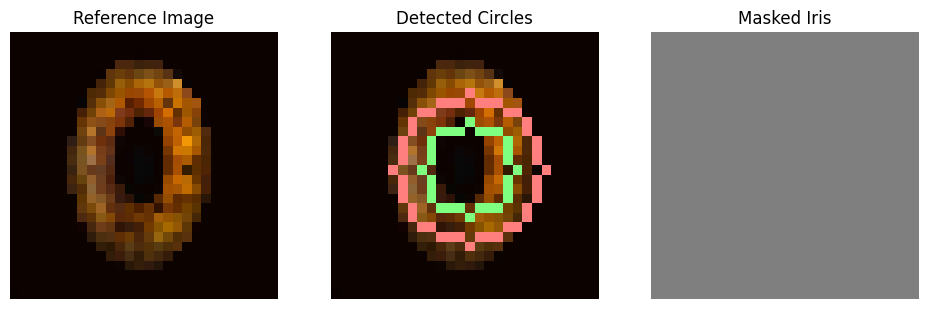

In [ ]:
def load_reference_images(reference_paths):
    """Load and preprocess reference eye images"""
    reference_images = {}
    for color, path in reference_paths.items():
        # Load image
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Resize to match our model's input size
        img = cv2.resize(img, (28, 28))

        # Normalize
        img = img.astype(np.float32) / 255.0

        reference_images[color] = img

    return reference_images

def extract_iris_color_from_reference(image, encoder, decoder, debug=True):
    """Extract iris color from a single reference image with improved preprocessing"""
    # Ensure image is properly normalized to [-1, 1] for tanh activation
    if image.max() > 1.0:
        image = image.astype(np.float32) / 255.0
    image = image * 2.0 - 1.0  # Scale to [-1, 1]

    # Detect iris and pupil
    iris_circle, pupil_circle = detect_iris_boundaries_simple(image)

    if iris_circle is None or pupil_circle is None:
        raise ValueError("Could not detect valid iris boundaries")

    # Create visualization
    if debug:
        plt.figure(figsize=(20, 4))

        # Original image
        plt.subplot(1, 5, 1)
        plt.imshow((image + 1.0) / 2.0)  # Convert back to [0, 1] for display
        plt.title('Reference Image')
        plt.axis('off')

        # Detected circles
        marked = image.copy()
        cv2.circle(marked,
                  (int(iris_circle[0]), int(iris_circle[1])),
                  int(iris_circle[2]),
                  (0, 1, 0), 1)
        cv2.circle(marked,
                  (int(pupil_circle[0]), int(pupil_circle[1])),
                  int(pupil_circle[2]),
                  (1, 0, 0), 1)
        plt.subplot(1, 5, 2)
        plt.imshow((marked + 1.0) / 2.0)
        plt.title('Detected Circles')
        plt.axis('off')

    # Create and apply mask
    mask = np.zeros_like(image)
    cv2.circle(mask,
              (int(iris_circle[0]), int(iris_circle[1])),
              int(iris_circle[2]),
              (1, 1, 1), -1)
    cv2.circle(mask,
              (int(pupil_circle[0]), int(pupil_circle[1])),
              int(pupil_circle[2]),
              (0, 0, 0), -1)

    masked_image = image * mask

    if debug:
        plt.subplot(1, 5, 3)
        plt.imshow((masked_image + 1.0) / 2.0)
        plt.title('Masked Iris')
        plt.axis('off')

    # Get latent vector
    latent_vector = encoder.predict(np.expand_dims(masked_image, 0))[0]

    # Test reconstruction
    if debug:
        # Reconstruct from latent vector
        reconstructed = decoder.predict(np.expand_dims(latent_vector, 0))[0]

        # Show both intermediate and final reconstruction
        plt.subplot(1, 5, 4)
        plt.imshow((reconstructed + 1.0) / 2.0)
        plt.title('Direct Reconstruction')
        plt.axis('off')

        # Apply mask to reconstruction
        masked_reconstruction = reconstructed * mask
        plt.subplot(1, 5, 5)
        plt.imshow((masked_reconstruction + 1.0) / 2.0)
        plt.title('Masked Reconstruction')
        plt.axis('off')

        plt.show()

    return latent_vector

def create_color_vectors_from_references(reference_images, encoder):
    """Create color vectors from reference images"""
    color_vectors = {}

    for color, image in reference_images.items():
        print(f"\nProcessing {color} reference image...")
        try:
            color_vectors[color] = extract_iris_color_from_reference(image, encoder, decoder)
        except ValueError as e:
            print(f"Error processing {color} image: {e}")

    return color_vectors

def apply_iris_color(target_image, desired_color, color_vectors, decoder, intensity=0.7):
    """Apply specified iris color to target image with improved blending"""
    # Normalize target image to [-1, 1]
    if target_image.max() > 1.0:
        target_image = target_image.astype(np.float32) / 255.0
    target_image = target_image * 2.0 - 1.0

    # Detect iris boundaries
    iris_circle, pupil_circle = detect_iris_boundaries_simple(target_image)
    if iris_circle is None or pupil_circle is None:
        print("No circles detected in target image!")
        return (target_image + 1.0) / 2.0  # Return normalized image

    # Create mask
    mask = np.zeros_like(target_image)
    cv2.circle(mask,
              (int(iris_circle[0]), int(iris_circle[1])),
              int(iris_circle[2]),
              (1, 1, 1), -1)
    cv2.circle(mask,
              (int(pupil_circle[0]), int(pupil_circle[1])),
              int(pupil_circle[2]),
              (0, 0, 0), -1)

    # Generate colored iris
    color_vector = color_vectors[desired_color]
    colored_iris = decoder.predict(np.expand_dims(color_vector, 0))[0]

    # Resize colored iris if needed
    if colored_iris.shape != target_image.shape:
        colored_iris = cv2.resize(colored_iris,
                                (target_image.shape[1], target_image.shape[0]))

    # Blend images in LAB color space for better color preservation
    target_lab = cv2.cvtColor(((target_image + 1.0) / 2.0 * 255).astype(np.uint8),
                             cv2.COLOR_RGB2LAB)
    colored_lab = cv2.cvtColor(((colored_iris + 1.0) / 2.0 * 255).astype(np.uint8),
                              cv2.COLOR_RGB2LAB)

    # Only blend A and B channels
    result_lab = target_lab.copy()
    result_lab[..., 1:] = cv2.addWeighted(target_lab[..., 1:], 1 - intensity,
                                         colored_lab[..., 1:], intensity, 0)

    # Convert back to RGB
    result = cv2.cvtColor(result_lab, cv2.COLOR_LAB2RGB).astype(np.float32) / 255.0

    # Apply mask
    result = result * mask + ((target_image + 1.0) / 2.0) * (1 - mask)

    return result

# Example usage in main:
if __name__ == "__main__":
    # Define paths to reference images
    reference_paths = {
        'brown': '/content/drive/MyDrive/ML final project/color_ref/browneye.jpg',
        'blue': '/content/drive/MyDrive/ML final project/color_ref/blueeye.jpg',
        'green': '/content/drive/MyDrive/ML final project/color_ref/greeneye.jpg',
        'hazel': '/content/drive/MyDrive/ML final project/color_ref/hazeleye.jpg'
    }

    print("Loading reference images...")
    reference_images = load_reference_images(reference_paths)

    print("\nExtracting color vectors from reference images...")
    color_vectors = create_color_vectors_from_references(reference_images, encoder)

    print("\nTesting color application...")
    # Test on a sample image from your dataset
    sample_image = image_data[0]
    for color in color_vectors.keys():
        print(f"\nApplying {color} color...")
        colored_image = apply_iris_color(sample_image, color, color_vectors, decoder, intensity=0.7)

In [ ]:
def load_reference_images(reference_paths):
    """Load and preprocess reference eye images"""
    reference_images = {}
    for color, path in reference_paths.items():
        # Load image
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Resize to match our model's input size
        img = cv2.resize(img, (28, 28))

        # Normalize
        img = img.astype(np.float32) / 255.0

        reference_images[color] = img

    return reference_images

Loading reference images...

Extracting color vectors from reference images...

Processing brown reference image...
1/1 [==============================] - 0s 30ms/step
Error processing brown image: Graph execution error:

Detected at node 'decoder/dense/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
      ColabKernelApp.launch_instance()
    File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start


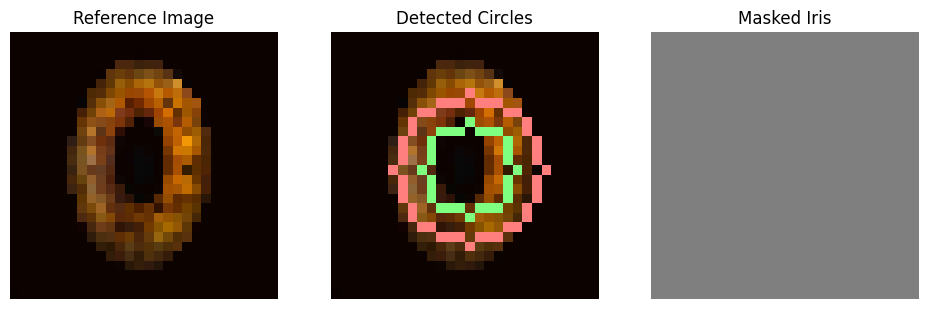

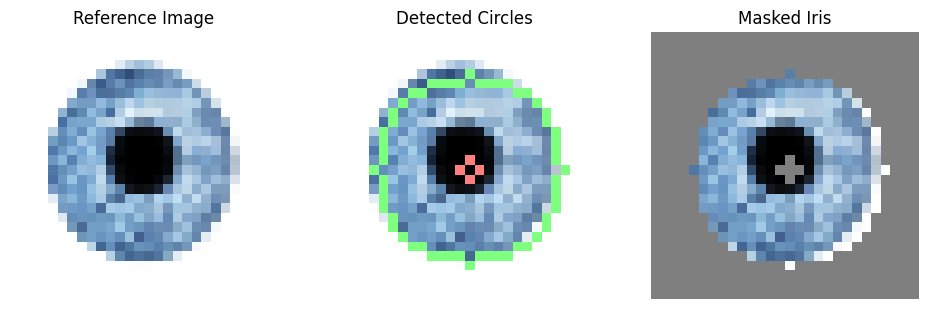

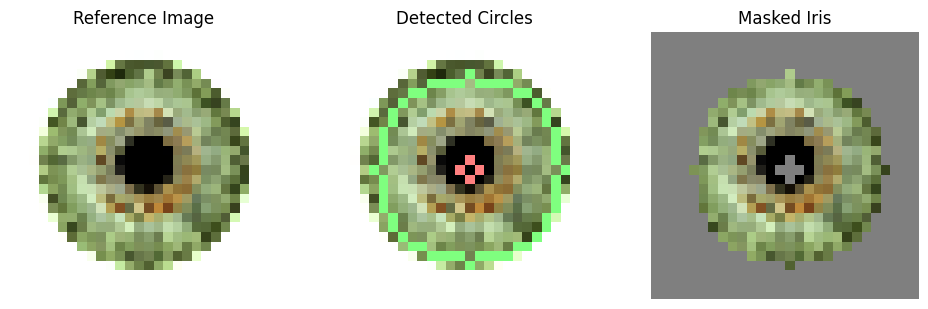

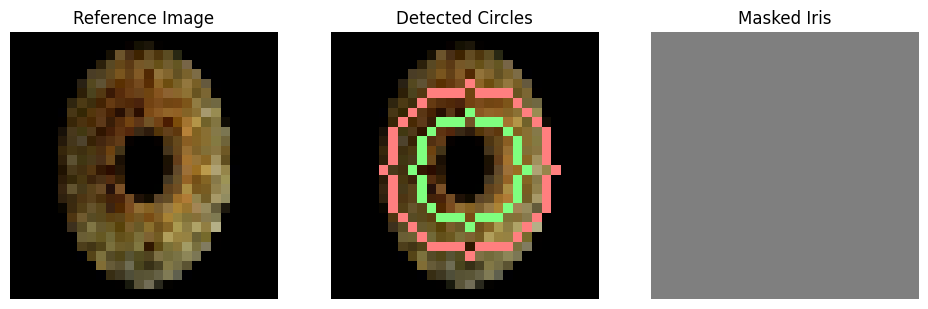

In [ ]:
def extract_iris_color_from_reference(image, encoder, decoder, debug=True):
    """Extract iris color from a single reference image"""
    # Ensure image is properly normalized to [-1, 1]
    if image.max() > 1.0:
        image = image.astype(np.float32) / 255.0
    image = image * 2.0 - 1.0

    # Detect iris and pupil with is_reference=True
    iris_circle, pupil_circle = detect_iris_boundaries_simple(image)

    if debug:
        plt.figure(figsize=(20, 4))
        plt.subplot(1, 5, 1)
        plt.imshow((image + 1.0) / 2.0)
        plt.title('Reference Image')
        plt.axis('off')

        # Show detected circles
        marked = image.copy()
        cv2.circle(marked,
                  (int(iris_circle[0]), int(iris_circle[1])),
                  int(iris_circle[2]),
                  (0, 1, 0), 1)
        cv2.circle(marked,
                  (int(pupil_circle[0]), int(pupil_circle[1])),
                  int(pupil_circle[2]),
                  (1, 0, 0), 1)
        plt.subplot(1, 5, 2)
        plt.imshow((marked + 1.0) / 2.0)
        plt.title('Detected Circles')
        plt.axis('off')

    # Create mask
    mask = np.zeros_like(image)
    cv2.circle(mask,
              (int(iris_circle[0]), int(iris_circle[1])),
              int(iris_circle[2]),
              (1, 1, 1), -1)
    cv2.circle(mask,
              (int(pupil_circle[0]), int(pupil_circle[1])),
              int(pupil_circle[2]),
              (0, 0, 0), -1)

    masked_image = image * mask

    if debug:
        plt.subplot(1, 5, 3)
        plt.imshow((masked_image + 1.0) / 2.0)
        plt.title('Masked Iris')
        plt.axis('off')

    # Get latent vector
    latent_vector = encoder.predict(np.expand_dims(masked_image, 0))[0]

    if debug:
        reconstructed = decoder.predict(np.expand_dims(latent_vector, 0))[0]
        plt.subplot(1, 5, 4)
        plt.imshow((reconstructed + 1.0) / 2.0)
        plt.title('Reconstructed')
        plt.axis('off')
        plt.show()

    return latent_vector

def create_color_vectors_from_references(reference_images, encoder, decoder):
    """Create color vectors from reference images"""
    color_vectors = {}

    for color, image in reference_images.items():
        print(f"\nProcessing {color} reference image...")
        try:
            color_vectors[color] = extract_iris_color_from_reference(
                image, encoder, decoder, debug=True
            )
            print(f"Successfully processed {color} image")
        except Exception as e:
            print(f"Error processing {color} image: {e}")

    return color_vectors

def load_reference_images(reference_paths):
    """Load and preprocess reference eye images"""
    reference_images = {}
    for color, path in reference_paths.items():
        # Load image
        img = cv2.imread(path)
        if img is None:
            print(f"Failed to load image at path: {path}")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Resize to match our model's input size
        img = cv2.resize(img, (28, 28))

        # Normalize
        img = img.astype(np.float32) / 255.0

        reference_images[color] = img

    return reference_images

# In your main section:
if __name__ == "__main__":
    # Define paths to reference images
    reference_paths = {
        'brown': '/content/drive/MyDrive/ML final project/color_ref/browneye.jpg',
        'blue': '/content/drive/MyDrive/ML final project/color_ref/blueeye.jpg',
        'green': '/content/drive/MyDrive/ML final project/color_ref/greeneye.jpg',
        'hazel': '/content/drive/MyDrive/ML final project/color_ref/hazeleye.jpg'
    }

    print("Loading reference images...")
    reference_images = load_reference_images(reference_paths)

    print("\nExtracting color vectors from reference images...")
    color_vectors = create_color_vectors_from_references(reference_images, encoder, decoder)

Loading reference images...

Testing iris unwrapping...


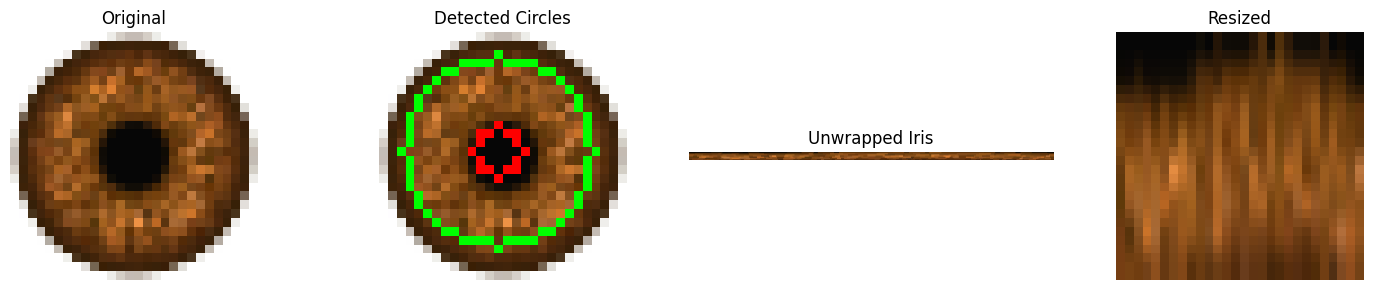

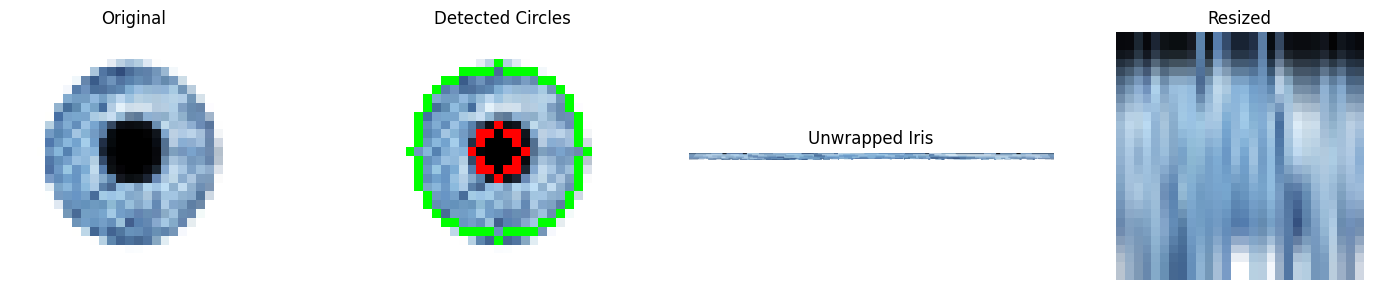

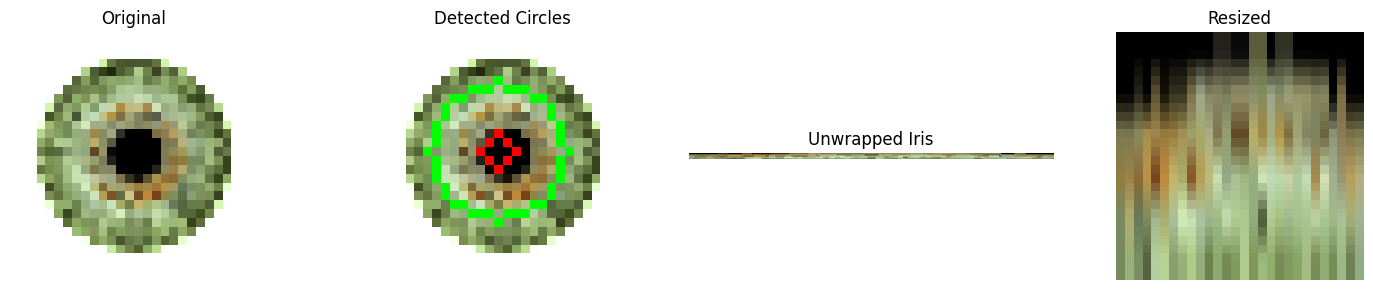

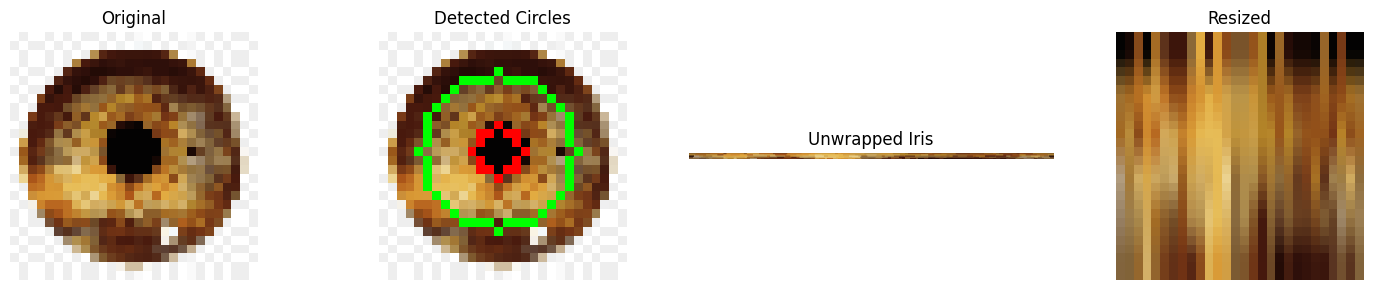

In [ ]:
def detect_iris_boundaries(image):
    """Detect iris and pupil boundaries using Hough circles"""
    # Convert image to grayscale and uint8
    gray = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)

    # Enhance contrast
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(4,4))
    enhanced = clahe.apply(gray)

    # First phase: Pupil detection
    # Create a binary mask for the pupil (darkest region)
    _, pupil_mask = cv2.threshold(enhanced, 40, 255, cv2.THRESH_BINARY_INV)
    kernel = np.ones((1,1), np.uint8)
    pupil_mask = cv2.morphologyEx(pupil_mask, cv2.MORPH_CLOSE, kernel)

    # Find contours in pupil mask
    contours, _ = cv2.findContours(pupil_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        return None, None

    # Find the largest contour (should be the pupil)
    pupil_contour = max(contours, key=cv2.contourArea)

    # Fit circle to pupil contour
    (pupil_x, pupil_y), pupil_radius = cv2.minEnclosingCircle(pupil_contour)

    # Second phase: Iris detection
    # Create a larger circle around the pupil for the iris
    iris_radius = pupil_radius * 3.0  # Typical iris radius is about 2.5 times pupil radius
    iris_x, iris_y = pupil_x, pupil_y

    # Validate circles
    if (pupil_radius < 2 or pupil_radius > 6 or
        iris_radius < 7 or iris_radius > 13):
        return None, None

    return ([iris_x, iris_y, iris_radius], [pupil_x, pupil_y, pupil_radius])

def unwrap_iris(image, iris_circle, pupil_circle):
    """Unwrap iris region to rectangular form"""
    center_x, center_y = int(iris_circle[0]), int(iris_circle[1])
    iris_radius = int(iris_circle[2])
    pupil_radius = int(pupil_circle[2])

    # Create unwrapped image
    unwrapped_height = int(iris_radius - pupil_radius)
    unwrapped_width = 360  # One degree per pixel
    unwrapped = np.zeros((unwrapped_height, unwrapped_width, 3))

    # Create coordinate maps for vectorized operation
    theta = np.linspace(0, 2*np.pi, unwrapped_width)
    r = np.linspace(pupil_radius, iris_radius, unwrapped_height)
    theta_grid, r_grid = np.meshgrid(theta, r)

    # Calculate x and y coordinates
    x_grid = center_x + r_grid * np.cos(theta_grid)
    y_grid = center_y + r_grid * np.sin(theta_grid)

    # Round coordinates and ensure they're within bounds
    x_grid = np.clip(np.round(x_grid), 0, image.shape[1]-1).astype(int)
    y_grid = np.clip(np.round(y_grid), 0, image.shape[0]-1).astype(int)

    # Map pixels
    for c in range(3):  # For each color channel
      unwrapped[:, :, c] = image[:, :, c][y_grid, x_grid]

    return unwrapped

def debug_unwrap(image, save_path=None):
    """Debug visualization for iris unwrapping process"""
    # Detect circles
    iris_circle, pupil_circle = detect_iris_boundaries(image)

    plt.figure(figsize=(15, 3))

    # Original image with circles
    plt.subplot(1, 4, 1)
    plt.imshow(image)
    plt.title('Original')
    plt.axis('off')

    if iris_circle is not None and pupil_circle is not None:
        # Draw circles on copy of original
        marked = image.copy()
        cv2.circle(marked,
                  (int(iris_circle[0]), int(iris_circle[1])),
                  int(iris_circle[2]),
                  (0, 1, 0), 1)
        cv2.circle(marked,
                  (int(pupil_circle[0]), int(pupil_circle[1])),
                  int(pupil_circle[2]),
                  (1, 0, 0), 1)

        plt.subplot(1, 4, 2)
        plt.imshow(marked)
        plt.title('Detected Circles')
        plt.axis('off')

        # Unwrap iris
        unwrapped = unwrap_iris(image, iris_circle, pupil_circle)
        plt.subplot(1, 4, 3)
        plt.imshow(unwrapped)
        plt.title('Unwrapped Iris')
        plt.axis('off')

        # Resize for encoder
        resized = cv2.resize(unwrapped, (28, 28))
        plt.subplot(1, 4, 4)
        plt.imshow(resized)
        plt.title('Resized')
        plt.axis('off')
    else:
        plt.subplot(1, 4, 2)
        plt.text(0.5, 0.5, 'No circles detected', ha='center', va='center')
        plt.axis('off')

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

    return resized, iris_circle is not None and pupil_circle is not None

# Add to main section:
if __name__ == "__main__":

    reference_paths = {
        'brown': '/content/drive/MyDrive/ML final project/color_ref/browneye2.jpg',
        'blue': '/content/drive/MyDrive/ML final project/color_ref/blueeye.jpg',
        'green': '/content/drive/MyDrive/ML final project/color_ref/greeneye.jpg',
        'hazel': '/content/drive/MyDrive/ML final project/color_ref/hazeleye2.jpg'
    }

    print("Loading reference images...")
    reference_images = load_reference_images(reference_paths)

    print("\nTesting iris unwrapping...")
    #for i in range(5):
    for color, image in reference_images.items():
        #print(f"\nProcessing image {image}")
        _, success = debug_unwrap(image)
        if not success:
            print("Failed to detect circles")

In [ ]:
def extract_iris_colors(reference_images, encoder):
    """Extract iris colors from reference images and encode them"""
    color_vectors = {}

    for color, image in reference_images.items():
        print(f"\nProcessing {color} reference image...")
        try:
            # normalize image
            if image.max() > 1.0:
              image = image.astype(np.float32) / 255.0

            # Detect iris boundaries
            iris_circle, pupil_circle = detect_iris_boundaries(image)
            if iris_circle is None or pupil_circle is None:
                raise ValueError("Could not detect iris boundaries")

            # Unwrap iris
            unwrapped = unwrap_iris(image, iris_circle, pupil_circle)

            # Resize for encoder
            resized = cv2.resize(unwrapped, (28, 28))
            resized = np.clip(resized,0,1)

            # Get latent vector
            latent_vector = encoder.predict(np.expand_dims(resized, 0))[0]

            # Store the vector
            color_vectors[color] = latent_vector

            # Debug visualization
            debug_unwrap(image)

            # debugging reconstructions
            reconstructed = decoder.predict(np.expand_dims(latent_vector, 0))[0]
            plt.figure(figsize=(10, 2))
            plt.subplot(1, 3, 1)
            plt.imshow(image)
            plt.title('Original')
            plt.axis('off')

            plt.subplot(1, 3, 2)
            plt.imshow(resized)
            plt.title('Preprocessed')
            plt.axis('off')

            plt.subplot(1, 3, 3)
            plt.imshow(np.clip(reconstructed, 0, 1))
            plt.title('Reconstructed')
            plt.axis('off')
            plt.show()




        except Exception as e:
            print(f"Error processing {color} image: {e}")

    return resized, color_vectors

"""
    color_vectors = {}

    for i, img in enumerate(image_data):
        # Detect iris boundaries
        iris_circle, pupil_circle = detect_iris_boundaries(img)
        if iris_circle is None or pupil_circle is None:
            continue

        # Unwrap iris
        unwrapped_iris = unwrap_iris(img, iris_circle, pupil_circle)

        # Resize unwrapped iris to match encoder input size
        resized_iris = cv2.resize(unwrapped_iris, (28, 28))

        # Get latent vector
        latent_vector = encoder.predict(np.expand_dims(resized_iris, 0))[0]

        # Store vector based on color class
        color = labels_df.iloc[i]['label']
        if color not in color_vectors:
            color_vectors[color] = []
        color_vectors[color].append(latent_vector)

    # Average vectors for each color
    averaged_vectors = {
        color: np.mean(vectors, axis=0)
        for color, vectors in color_vectors.items()
    }

    return averaged_vectors
"""

"\n    color_vectors = {}\n\n    for i, img in enumerate(image_data):\n        # Detect iris boundaries\n        iris_circle, pupil_circle = detect_iris_boundaries(img)\n        if iris_circle is None or pupil_circle is None:\n            continue\n\n        # Unwrap iris\n        unwrapped_iris = unwrap_iris(img, iris_circle, pupil_circle)\n\n        # Resize unwrapped iris to match encoder input size\n        resized_iris = cv2.resize(unwrapped_iris, (28, 28))\n\n        # Get latent vector\n        latent_vector = encoder.predict(np.expand_dims(resized_iris, 0))[0]\n\n        # Store vector based on color class\n        color = labels_df.iloc[i]['label']\n        if color not in color_vectors:\n            color_vectors[color] = []\n        color_vectors[color].append(latent_vector)\n\n    # Average vectors for each color\n    averaged_vectors = {\n        color: np.mean(vectors, axis=0)\n        for color, vectors in color_vectors.items()\n    }\n\n    return averaged_vectors\n"

In [ ]:
def apply_iris_color(colored_iris_test, target_image, desired_color, color_vectors, encoder, decoder, intensity=0.7):
    """Apply specified iris color to target image with visualization"""

    # query normalization
    if target_image.max() > 1.0:
        target_image = target_image.astype(np.float32) / 255.0

    image_embedding = encoder.predict(np.expand_dims(target_image, 0))[0]

    # Create figure for visualization
    plt.figure(figsize=(20, 4))
    current_plot = 1

    # Show original image
    plt.subplot(1, 5, current_plot)
    plt.imshow(target_image)
    plt.title('Original')
    plt.axis('off')
    current_plot += 1

    # Detect iris boundaries
    iris_circle, pupil_circle = detect_iris_boundaries2(target_image)
    if iris_circle is None or pupil_circle is None:
        print("No circles detected!")
        return target_image

    # Create visualization of detected circles
    circles_img = target_image.copy()
    cv2.circle(circles_img,
               (int(iris_circle[0]), int(iris_circle[1])),
               int(iris_circle[2]),
               (0, 1, 0), 1)  # Green for iris
    cv2.circle(circles_img,
               (int(pupil_circle[0]), int(pupil_circle[1])),
               int(pupil_circle[2]),
               (1, 0, 0), 1)  # Blue for pupil

    plt.subplot(1, 5, current_plot)
    plt.imshow(circles_img)
    plt.title('Detected Circles')
    plt.axis('off')
    current_plot += 1

    # Get color vector and generate colored iris
    if desired_color not in color_vectors:
        raise ValueError(f"Color {desired_color} not found in dataset")

    color_vector = color_vectors[desired_color]
    colored_iris = decoder.predict(np.expand_dims(color_vector, 0))[0]
    colored_iris = np.clip(colored_iris, 0, 1)

    # Show generated color pattern
    plt.subplot(1, 5, current_plot)
    plt.imshow(colored_iris_test)
    plt.title('Generated Color Pattern')
    plt.axis('off')
    current_plot += 1

    # Create masks for iris and pupil regions
    mask = np.zeros_like(target_image)
    cv2.circle(mask,
              (int(iris_circle[0]), int(iris_circle[1])),
              int(iris_circle[2]),
              (1, 1, 1), -1)
    cv2.circle(mask,
              (int(pupil_circle[0]), int(pupil_circle[1])),
              int(pupil_circle[2]),
              (0, 0, 0), -1)

    # Show mask
    plt.subplot(1, 5, current_plot)
    plt.imshow(mask)
    plt.title('Blend Mask')
    plt.axis('off')
    current_plot += 1

    # Blend images
    result = target_image.copy()
    colored_resized = cv2.resize(colored_iris_test, (target_image.shape[1], target_image.shape[0]))

    # Modify blending to preserve more of the original texture
    # Convert to HSV for better color blending
    original_hsv = cv2.cvtColor((target_image * 255).astype(np.uint8), cv2.COLOR_RGB2HSV)
    colored_hsv = cv2.cvtColor((colored_resized * 255).astype(np.uint8), cv2.COLOR_RGB2HSV)

    # Only blend the hue and saturation channels
    result_hsv = original_hsv.copy()
    result_hsv[..., 0] = cv2.addWeighted(original_hsv[..., 0], 1 - intensity,
                                        colored_hsv[..., 0], intensity, 0)
    result_hsv[..., 1] = cv2.addWeighted(original_hsv[..., 1], 1 - intensity,
                                        colored_hsv[..., 1], intensity, 0)

    # Convert back to RGB
    result = cv2.cvtColor(result_hsv, cv2.COLOR_HSV2RGB) / 255.0

    # Apply mask
    result = result * mask + target_image * (1 - mask)

    # Show final result
    plt.subplot(1, 5, current_plot)
    plt.imshow(result)
    plt.title('Final Result')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return result

Loading reference images...

Extracting iris colors with visualization...

Processing brown reference image...
1/1 [==============================] - 0s 33ms/step


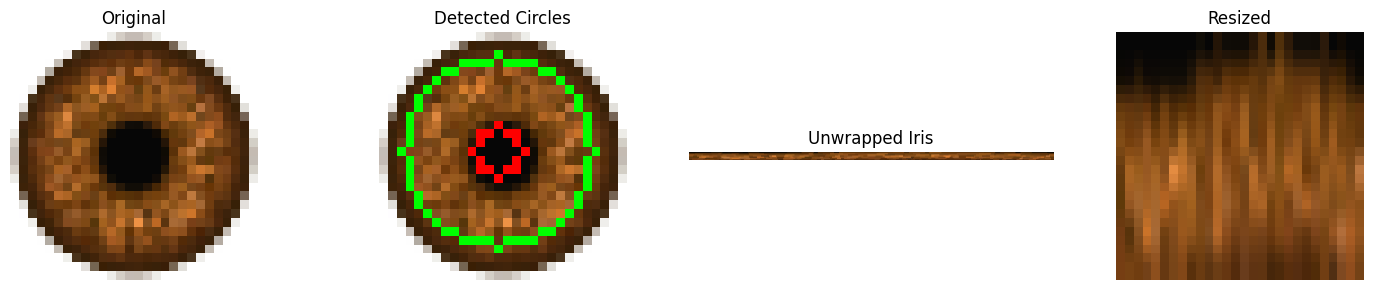

Error processing brown image: Graph execution error:

Detected at node 'decoder/dense/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
      ColabKernelApp.launch_instance()
    File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.

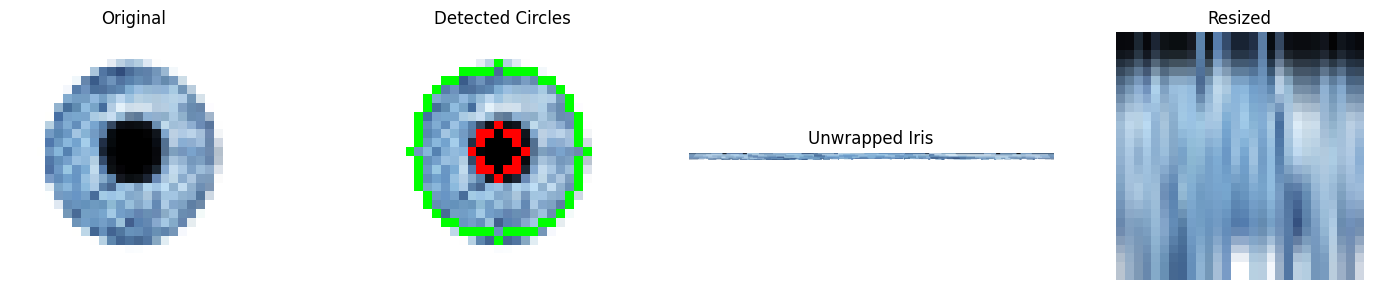

Error processing blue image: Graph execution error:

Detected at node 'decoder/dense/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
      ColabKernelApp.launch_instance()
    File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.1

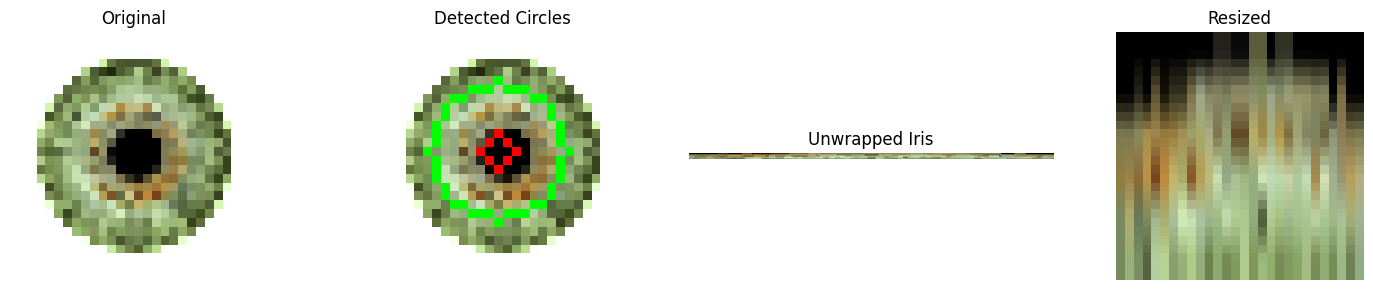

Error processing green image: Graph execution error:

Detected at node 'decoder/dense/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
      ColabKernelApp.launch_instance()
    File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.

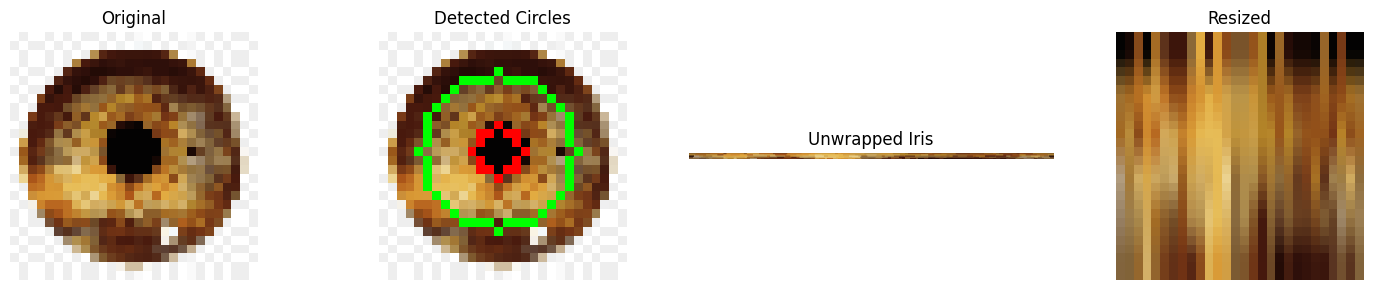

Error processing hazel image: Graph execution error:

Detected at node 'decoder/dense/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
      ColabKernelApp.launch_instance()
    File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.

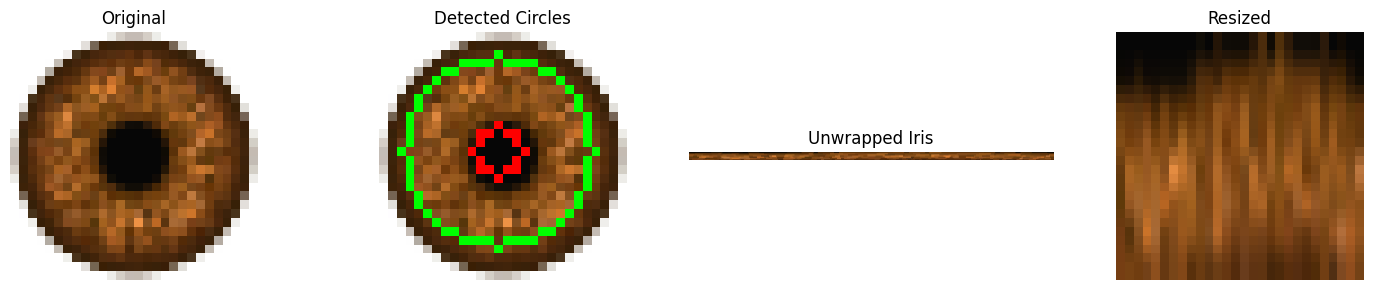


Testing color application with visualization...

Applying blue color...
1/1 [==============================] - 0s 28ms/step


InvalidArgumentError: Graph execution error:

Detected at node 'decoder/dense/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
      ColabKernelApp.launch_instance()
    File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback
      ret = callback()
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner
      self.ctx_run(self.run)
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run
      yielded = self.gen.send(value)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
      self.do_execute(
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
      result = self._run_cell(
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
      return runner(coro)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-173-a2f7632e358e>", line 7, in <cell line: 1>
      color_vectors = extract_iris_colors(image_data, encoder, labels_df, debug=True)
    File "<ipython-input-172-bd36d1d25384>", line 148, in extract_iris_colors
      reconstructed = decoder.predict(np.expand_dims(latent_vector, 0))[0]
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2350, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2137, in predict_function
      return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2123, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2111, in run_step
      outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2079, in predict_step
      return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/layers/core/dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "/usr/local/lib/python3.10/dist-packages/keras/activations.py", line 317, in relu
      return backend.relu(
    File "/usr/local/lib/python3.10/dist-packages/keras/backend.py", line 5369, in relu
      x = tf.nn.relu(x)
Node: 'decoder/dense/Relu'
Matrix size-incompatible: In[0]: [1,64], In[1]: [4,100352]
	 [[{{node decoder/dense/Relu}}]] [Op:__inference_predict_function_13598]

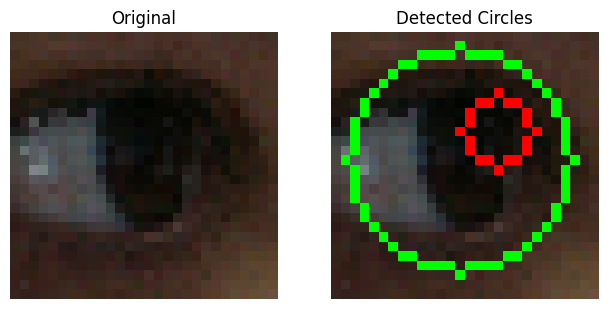

In [ ]:
if __name__ == "__main__":


    reference_paths = {
        'brown': '/content/drive/MyDrive/ML final project/color_ref/browneye2.jpg',
        'blue': '/content/drive/MyDrive/ML final project/color_ref/blueeye.jpg',
        'green': '/content/drive/MyDrive/ML final project/color_ref/greeneye.jpg',
        'hazel': '/content/drive/MyDrive/ML final project/color_ref/hazeleye2.jpg'
    }

    print("Loading reference images...")
    reference_images = load_reference_images(reference_paths)

    print("\nExtracting iris colors with visualization...")

    _, color_vectors = extract_iris_colors(reference_images, encoder)
    #print(resized)
    for c, image in reference_images.items():
      resized, _ = debug_unwrap(image)

      print("\nTesting color application with visualization...")
      sample_image = image_data[148]
      for color in ['blue', 'green', 'brown', 'hazel']:

        print(f"\nApplying {color} color...")
        #resize, _ = extract_iris_colors(reference_images, encoder)
        colored_image = apply_iris_color(resized, sample_image, color, color_vectors, encoder, decoder, intensity=1.0)

Loading reference images...

Extracting iris colors with visualization...

Processing brown reference image...
1/1 [==============================] - 0s 31ms/step


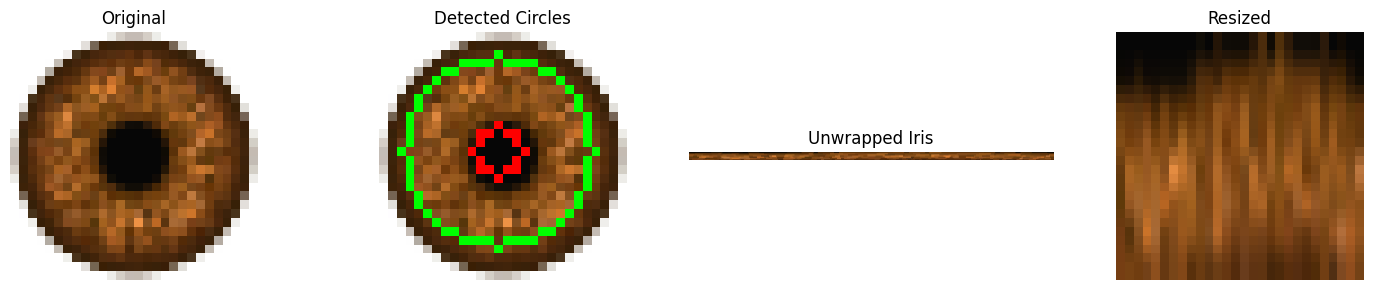

Error processing brown image: Graph execution error:

Detected at node 'decoder/dense/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
      ColabKernelApp.launch_instance()
    File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.

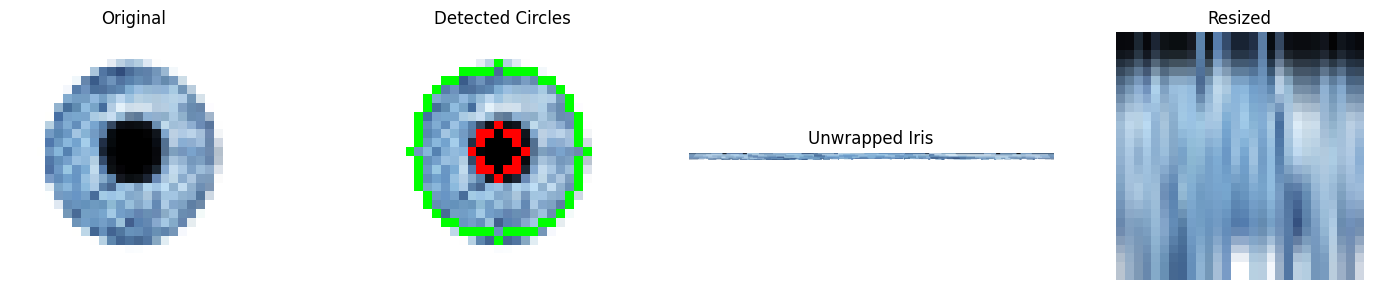

Error processing blue image: Graph execution error:

Detected at node 'decoder/dense/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
      ColabKernelApp.launch_instance()
    File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.1

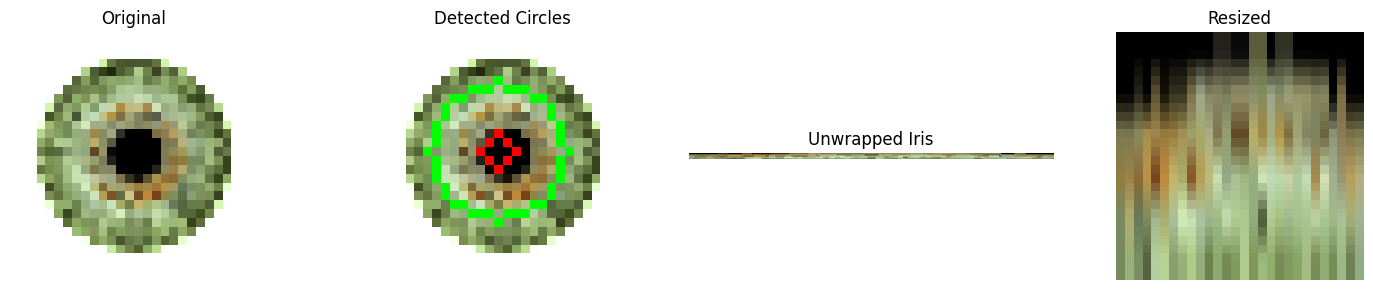

Error processing green image: Graph execution error:

Detected at node 'decoder/dense/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
      ColabKernelApp.launch_instance()
    File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.

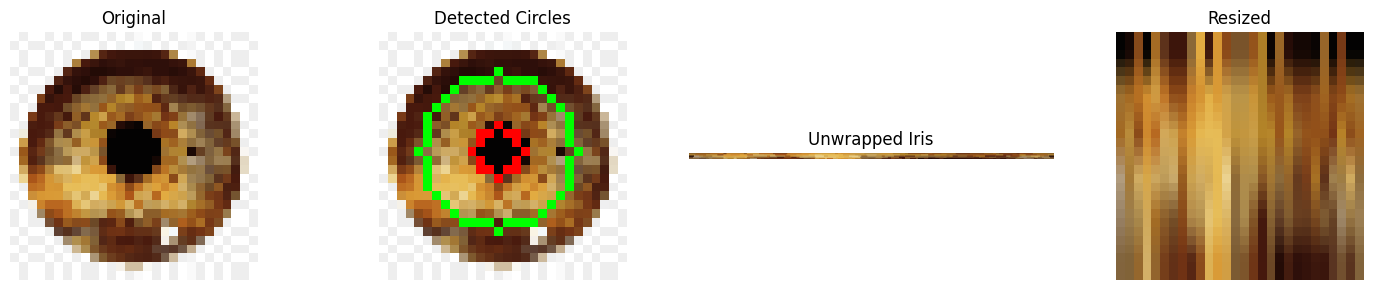

Error processing hazel image: Graph execution error:

Detected at node 'decoder/dense/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
      ColabKernelApp.launch_instance()
    File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.

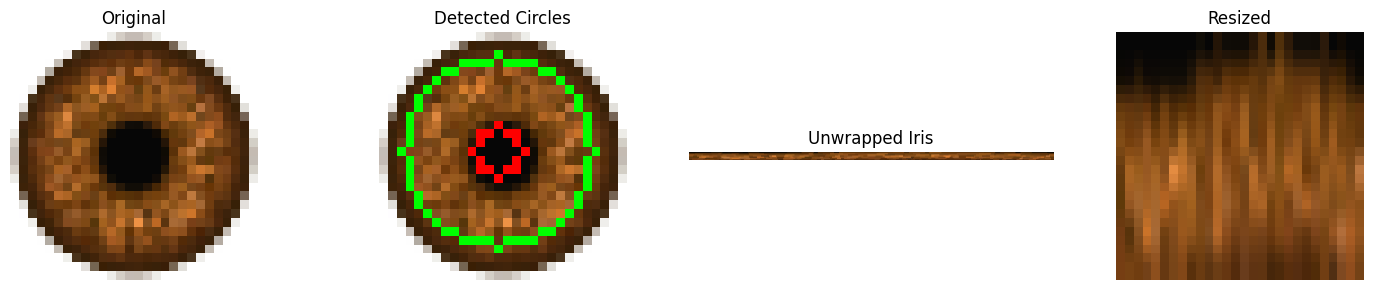


Testing color application with visualization...

Applying blue color...
1/1 [==============================] - 0s 31ms/step


InvalidArgumentError: Graph execution error:

Detected at node 'decoder/dense/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
      ColabKernelApp.launch_instance()
    File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback
      ret = callback()
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner
      self.ctx_run(self.run)
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run
      yielded = self.gen.send(value)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
      self.do_execute(
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
      result = self._run_cell(
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
      return runner(coro)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-173-a2f7632e358e>", line 7, in <cell line: 1>
      color_vectors = extract_iris_colors(image_data, encoder, labels_df, debug=True)
    File "<ipython-input-172-bd36d1d25384>", line 148, in extract_iris_colors
      reconstructed = decoder.predict(np.expand_dims(latent_vector, 0))[0]
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2350, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2137, in predict_function
      return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2123, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2111, in run_step
      outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2079, in predict_step
      return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/layers/core/dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "/usr/local/lib/python3.10/dist-packages/keras/activations.py", line 317, in relu
      return backend.relu(
    File "/usr/local/lib/python3.10/dist-packages/keras/backend.py", line 5369, in relu
      x = tf.nn.relu(x)
Node: 'decoder/dense/Relu'
Matrix size-incompatible: In[0]: [1,64], In[1]: [4,100352]
	 [[{{node decoder/dense/Relu}}]] [Op:__inference_predict_function_13598]

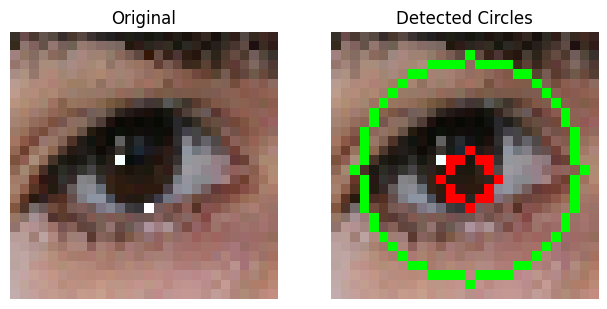

In [ ]:
if __name__ == "__main__":


    reference_paths = {
        'brown': '/content/drive/MyDrive/ML final project/color_ref/browneye2.jpg',
        'blue': '/content/drive/MyDrive/ML final project/color_ref/blueeye.jpg',
        'green': '/content/drive/MyDrive/ML final project/color_ref/greeneye.jpg',
        'hazel': '/content/drive/MyDrive/ML final project/color_ref/hazeleye2.jpg'
    }

    print("Loading reference images...")
    reference_images = load_reference_images(reference_paths)

    print("\nExtracting iris colors with visualization...")

    _, color_vectors = extract_iris_colors(reference_images, encoder)
    #print(resized)
    for c, image in reference_images.items():
      resized, _ = debug_unwrap(image)

      print("\nTesting color application with visualization...")
      sample_image = image_data[234]
      for color in ['blue', 'green', 'brown', 'hazel']:

        print(f"\nApplying {color} color...")
        #resize, _ = extract_iris_colors(reference_images, encoder)
        colored_image = apply_iris_color(resized, sample_image, color, color_vectors, encoder, decoder, intensity=1.0)

Loading reference images...

Extracting iris colors with visualization...

Processing brown reference image...
1/1 [==============================] - 0s 27ms/step


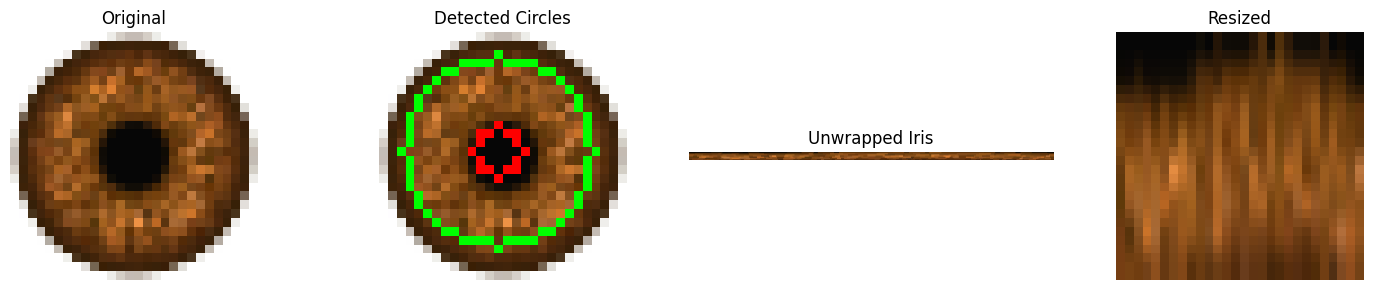

Error processing brown image: Graph execution error:

Detected at node 'decoder/dense/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
      ColabKernelApp.launch_instance()
    File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.

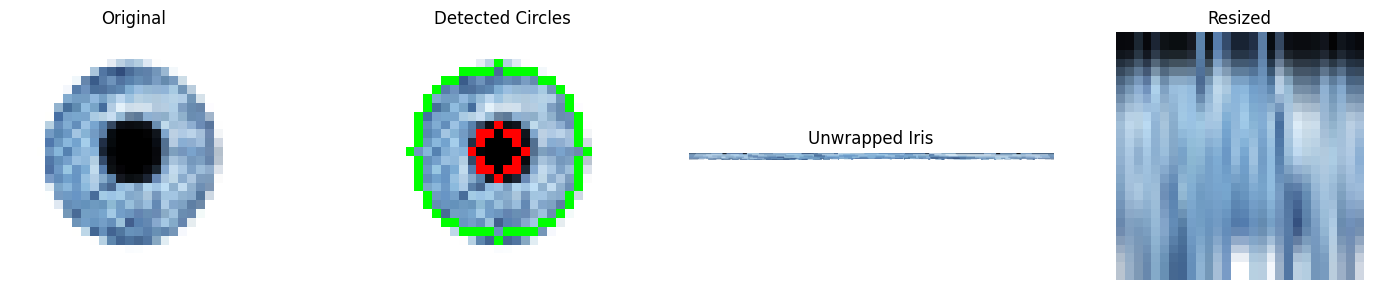

Error processing blue image: Graph execution error:

Detected at node 'decoder/dense/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
      ColabKernelApp.launch_instance()
    File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.1

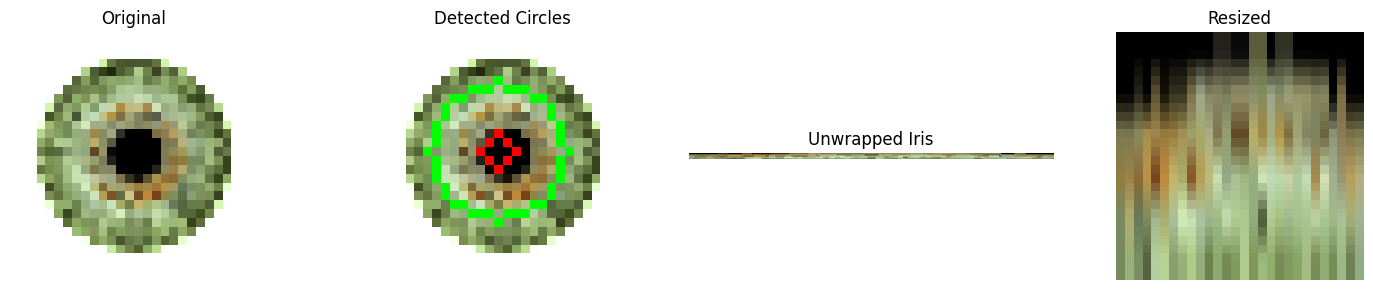

Error processing green image: Graph execution error:

Detected at node 'decoder/dense/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
      ColabKernelApp.launch_instance()
    File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.

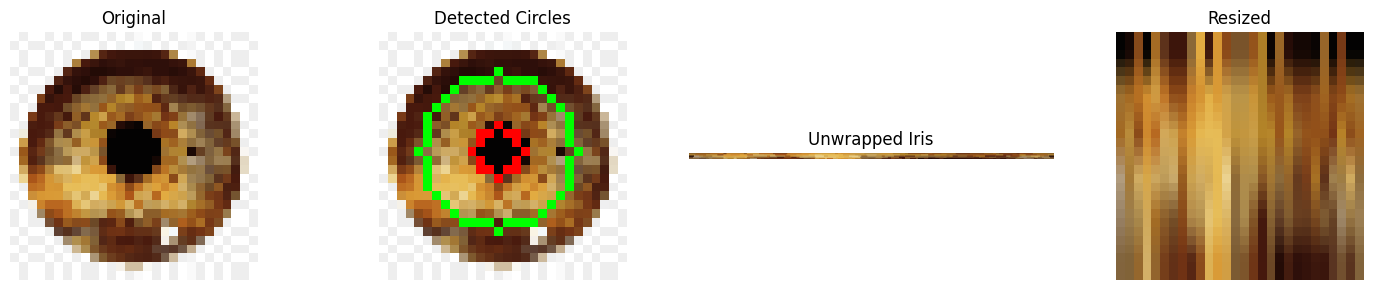

Error processing hazel image: Graph execution error:

Detected at node 'decoder/dense/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
      ColabKernelApp.launch_instance()
    File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.

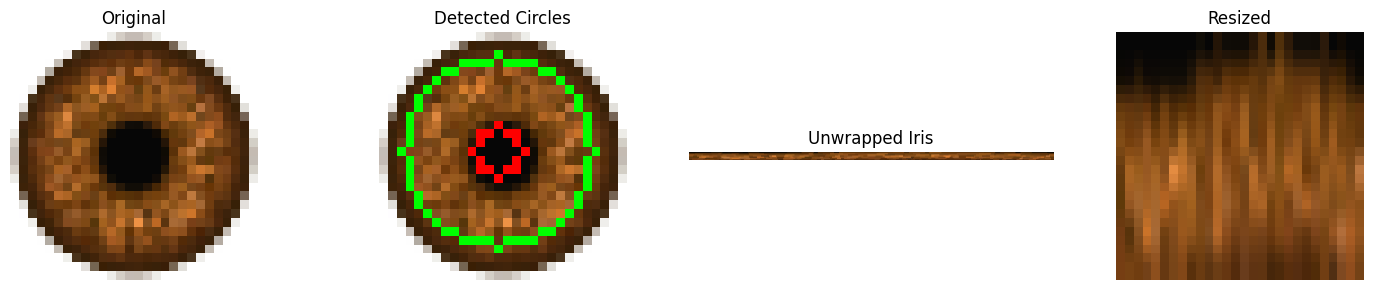


Testing color application with visualization...

Applying blue color...
1/1 [==============================] - 0s 26ms/step


InvalidArgumentError: Graph execution error:

Detected at node 'decoder/dense/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
      ColabKernelApp.launch_instance()
    File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback
      ret = callback()
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner
      self.ctx_run(self.run)
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run
      yielded = self.gen.send(value)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
      self.do_execute(
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
      result = self._run_cell(
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
      return runner(coro)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-173-a2f7632e358e>", line 7, in <cell line: 1>
      color_vectors = extract_iris_colors(image_data, encoder, labels_df, debug=True)
    File "<ipython-input-172-bd36d1d25384>", line 148, in extract_iris_colors
      reconstructed = decoder.predict(np.expand_dims(latent_vector, 0))[0]
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2350, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2137, in predict_function
      return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2123, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2111, in run_step
      outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2079, in predict_step
      return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/layers/core/dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "/usr/local/lib/python3.10/dist-packages/keras/activations.py", line 317, in relu
      return backend.relu(
    File "/usr/local/lib/python3.10/dist-packages/keras/backend.py", line 5369, in relu
      x = tf.nn.relu(x)
Node: 'decoder/dense/Relu'
Matrix size-incompatible: In[0]: [1,64], In[1]: [4,100352]
	 [[{{node decoder/dense/Relu}}]] [Op:__inference_predict_function_13598]

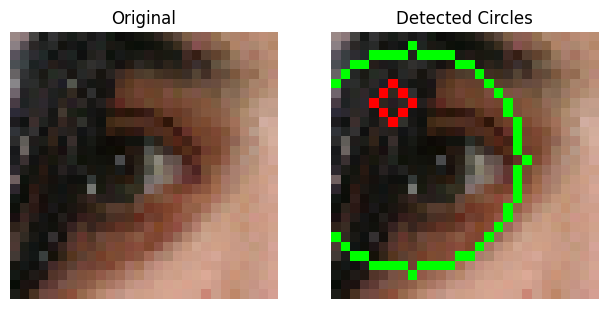

In [ ]:
if __name__ == "__main__":


    reference_paths = {
        'brown': '/content/drive/MyDrive/ML final project/color_ref/browneye2.jpg',
        'blue': '/content/drive/MyDrive/ML final project/color_ref/blueeye.jpg',
        'green': '/content/drive/MyDrive/ML final project/color_ref/greeneye.jpg',
        'hazel': '/content/drive/MyDrive/ML final project/color_ref/hazeleye2.jpg'
    }

    print("Loading reference images...")
    reference_images = load_reference_images(reference_paths)

    print("\nExtracting iris colors with visualization...")

    _, color_vectors = extract_iris_colors(reference_images, encoder)
    #print(resized)
    for c, image in reference_images.items():
      resized, _ = debug_unwrap(image)

      print("\nTesting color application with visualization...")
      sample_image = image_data[440]
      for color in ['blue', 'green', 'brown', 'hazel']:

        print(f"\nApplying {color} color...")
        #resize, _ = extract_iris_colors(reference_images, encoder)
        colored_image = apply_iris_color(resized, sample_image, color, color_vectors, encoder, decoder, intensity=1.0)

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

def greet(name, intensity):
    return "Hello, " + name + "!" * int(intensity)

demo = gr.Interface(
    fn=greet,
    inputs=["image"],
    outputs=["text"],
)



demo.launch()